# <span style="color:#0b486b">SIT 112 - Data Science Concepts - Assignment 2</span>

---
Lecturer: Sergiy Shelyag | sergiy.shelyag@deakin.edu.au<br />

School of Information Technology, <br />
Deakin University, VIC, Australia.

### <span style="color:#0b486b">Due: 5pm, 22th May 2020 </span>
---

## <span style="color:#0b486b">Instructions</span>

This notebook has been prepared for you to complete Assignment 2. Some sections have been partially completed  to help you get started. **The total marks for this notebook is 200**.

* Before you start, read the entire notebook carefully to understand what you need to do. You should also refer to the main instructions in *Assignment2_instructions.pdf*  to know what else you need to complete for this assignment as well submission instruction. <br><br>

* Instructions marked with **(D)** and **(HD)** are for students aiming at high grades. They are more involved and can be completed after all other instructions.


* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br><br>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL**, there will be place where you **must** provide your own comment when instructed. <br><br>


### Submission

You are required to submit **five** files: <br><br>

* The source of your solution notebook: **[groupID]_assignment2_solution.ipynb**
* An exported version of your output: **[groupID]_assignment2_output.html**  
* Three json data files storing tweets collected for the three keywords, named **[groupID]_[w1].json**, **[groupID]_[w2].json**, **[groupID]_[w3].json** where **[w1], [w2], [w3]** are the three keywords you have been provided.
    


As you go through this notebook:

* markdown cells marked with **Note** mean description sections.
* markdown cells marked with **Instruction** mean the instructions given to you to complete the designated section.

## <span style="color:#0b486b">Part 1: Crawling and Storing Tweet Data</span>


The first part of the assignment examines your skills and knowledge to query tweets and store them in json files. For **each** provided keyword, your tasks are:

* Crawl all tweets which contain this keyword written in English and geocoded within the location, provided for your group.
* Store the tweets collected into json files.

***Follow the instructions below to complete your task***.

**Note**: The following packages will be required for this assignment. If you need to import more packages, you might append them to the end of the following cell.

In [1]:
#Import packages needed for processing
import re
import json
import xml
import numpy as np
from collections import Counter
from TwitterAPI import TwitterAPI # in case you need to install this package, see practical 6
from sklearn.cluster import KMeans

import requests

# disabling urllib3 warnings
requests.packages.urllib3.disable_warnings()

import matplotlib.pyplot as plt
%matplotlib inline

#If you need add any additional packages, then add them below

from scipy import stats
import numpy.polynomial.polynomial as poly
import pandas
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000



**Instruction 1.1**. Enter your provided keywords to the variable **keywords** below.

[**Total mark: 3**]

In [2]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

#Enter the list of three keywords you selected to the variables keywords below
#e.g. keywords = ["abc", "def", "ghi"]

keywords = ['scene', 'plate', 'duck']

**Instruction 1.2**. Before you can perform a query to Twitter API, you need to supply authentication information. Practical sessions 6 and 7 show you how to obtain this information. **Your task is to supply the authentication information in the cell below**.

**Note**: You might decide to regenerate this authentication from the pracs if you would like too. <span style="color:red">After the assignment has been marked, you are strongly recommended to regenerate this authentication information from your account to maintain your privacy.</span> 


[**Total mark: 5**]

In [3]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# Twitter API credentials 
CONSUMER_KEY = "AQWRUx6f2Ibhd9rkE6kn7trtx"
CONSUMER_SECRET =  "PmxpJ6JBEe1FSWpfvsUBxR2p6XJpta8wayXemJfJEz5JpBgTG0"
OAUTH_TOKEN =  "1253015092440043521-j6SYtdsLJQQwcydKJTJstF6kSLlT7G"
OAUTH_TOKEN_SECRET =  "MBVFglUGFlQWFSfevIprlULMpj2PVyXzpA8PJlHDswVxW"

# Authenticating with your application credentials
api = TwitterAPI(CONSUMER_KEY,
                 CONSUMER_SECRET,
                 OAUTH_TOKEN,
                 OAUTH_TOKEN_SECRET) 

**Note**: As you have learned from the pracical sessions, to perform a query from Twitter API for a particular geo-coded location you need a center point and a radius. The center point is specified by its (latitude,longitute) pair. **The information below has been provided to you to perform the query in the subsequent tasks**.

In [4]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
# geo coordinations of the desired place
PLACE_LAT = 37.7749
PLACE_LON = -122.4194
PLACE_RAD = 200

**Instruction 1.3**. For each keyword, you are required to crawl at least **200** tweets (the more the better) using the Twitter API. However, as you have learned from the practical sessions, each query will return a maximum of only **100** tweets. Therefore, subsequent query **must** use the maximum Tweet ID from the previous batch to crawl the next lot.

The following function, called ***retrieve_tweets()***, has been **partially** implemented to automatically download tweets until it reaches the maximum number of tweets needed. 

For example, a function call
```
retrieve_tweets(api, 'car', 50, 200, latitude, longitude, radius)
```
will attempt to crawl a total of at least 200 tweets that contains the word 'car' for a location with given latitude, longidude and radius around it. Within each single query, it will attempt to obtain 50 tweets.

**Your task is to walk through this function and enter your own codes where instructed to complete the function**.

[**Total mark: 10**]

In [5]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
You will be required to insert your own codes to complete this function. 
Walk through this function and enter your own codes where instructed.
'''
def retrieve_tweets(api, keyword, batch_count, total_count, latitude, longitude, radius):
    """
    collects tweets using the Twitter search API
    
    api:         Twitter API instance
    keyword:     search keyword
    batch_count: maximum number of tweets to collect per each request
    total_count: maximum number of tweets in total
    """

    
    # the collection of tweets to be returned
    tweets_unfiltered = []
    tweets = []
    
    # the number of tweets within a single query
    batch_count = str(batch_count)
    
    '''
    You are required to insert your own code where instructed to perform the first query to Twitter API.
    Hint: revise the practical session on Twitter API on how to perform query to Twitter API.
    '''
    # per the first query, to obtain max_id_str which will be used later to query sub
    resp = api.request('search/tweets', {'q': keyword,
                                         'count': '300',
                                         'lang':'en',
                                         'result_type':'recent',
                                         'geocode':'{},{},{}mi'.format(latitude, longitude, radius)})
    
    # store the tweets in a list
    
    

    # check first if there was an error
    if ('errors' in resp.json()):
        errors = resp.json()['errors']
        if (errors[0]['code'] == 88):
            print('Too many attempts to load tweets.')
            print('You need to wait for a few minutes before accessing Twitter API again.')
    
    if ('statuses' in resp.json()):
        tweets_unfiltered += resp.json()['statuses']
        tweets = [tweet for tweet in tweets_unfiltered if ((tweet['retweeted'] != True) and ('RT @' not in tweet['text']))]
    
        # find the max_id_str for the next batch
        ids = [tweet['id'] for tweet in tweets_unfiltered]
        max_id_str = str(min(ids))

        # loop until as many tweets as total_count is collected
        number_of_tweets = len(tweets)
        while number_of_tweets < total_count:

            resp = api.request('search/tweets', {'q': keyword,
                                             'count': '300',
                                             'lang':'en',
                                             'result_type': 'recent',
                                             'max_id': max_id_str,
                                             'geocode': '{},{},{}mi'.format(latitude, longitude, radius)}) 
                          

            if ('statuses' in resp.json()):
                tweets_unfiltered += resp.json()['statuses']
                tweets = [tweet for tweet in tweets_unfiltered if ((tweet['retweeted'] != True) and ('RT @' not in tweet['text']))]
 
                ids = [tweet['id'] for tweet in tweets_unfiltered]
                max_id_str = str(min(ids))
            
                number_of_tweets = len(tweets)
        
            print("{} tweets are collected for keyword {}. Last tweet created at {}".format(number_of_tweets, 
                                                                                    keyword, 
                                                                                    tweets[number_of_tweets-1]['created_at']))
    return tweets

**Instruction 1.4**. After having defined the ***retrieve_tweets()*** function above, you are now ready to use this function to collect your tweets. Your task is to write the code to perform three function calls, each of which corresponds to one keyword. And, you are required to collect at least **200** tweets for each keyword (the more the better).

[**Total mark: 9**]

In [14]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Your task is to write the code to perform three function calls, each corresponds to one keyword. 
And, you are required to collect at least 200 tweets for each key word.
'''

# Collecting the tweets for three assigned keywords, 
# Your function call should look like this:  retrieve_tweets(api,'keyword',single_count,total_count)

k1_tweets = retrieve_tweets(api, 'scene', 50, 300, PLACE_LAT, PLACE_LON, PLACE_RAD)
k2_tweets = retrieve_tweets(api, 'plate' , 50, 300, PLACE_LAT, PLACE_LON, PLACE_RAD)
k3_tweets = retrieve_tweets(api, 'duck', 50, 300, PLACE_LAT, PLACE_LON, PLACE_RAD)


# PLEASE NOTE THAT IF YOU RUN THIS CELL, IT MIGHT TAKE A WHILE TO DOWNLOAD ALL THE TWEETS REQUIRED.
# MAKE SURE THAT YOU WAIT UNTILL THE CELL FINISHES RUNNING.

96 tweets are collected for keyword scene. Last tweet created at Sat May 09 20:18:01 +0000 2020
146 tweets are collected for keyword scene. Last tweet created at Sat May 09 17:48:44 +0000 2020
185 tweets are collected for keyword scene. Last tweet created at Sat May 09 16:26:06 +0000 2020
211 tweets are collected for keyword scene. Last tweet created at Sat May 09 14:54:29 +0000 2020
253 tweets are collected for keyword scene. Last tweet created at Sat May 09 06:30:08 +0000 2020
309 tweets are collected for keyword scene. Last tweet created at Sat May 09 03:47:08 +0000 2020
166 tweets are collected for keyword plate. Last tweet created at Fri May 08 19:45:52 +0000 2020
254 tweets are collected for keyword plate. Last tweet created at Fri May 08 03:01:19 +0000 2020
336 tweets are collected for keyword plate. Last tweet created at Thu May 07 17:57:20 +0000 2020
88 tweets are collected for keyword duck. Last tweet created at Sat May 09 02:01:31 +0000 2020
117 tweets are collected for keyw

**Instruction 1.5**. To verify the downloading process, write your code to print out the number of tweets which has been collected for each keyword.

[**Total mark: 3**]

In [15]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your code to print the number of tweets have been collected for each keyword
'''
print("Number of tweets for keyword scene:", len(k1_tweets),'\n')
for i, tweet in enumerate(k1_tweets):
    print(i, tweet['text'])
    
print('\n',"Number of tweets for keyword plate:", len(k2_tweets),'\n')  
for i, tweet in enumerate(k2_tweets):
    print(i, tweet['text'])
    
print('\n',"Number of tweets for keyword duck:", len(k3_tweets),'\n')   
for i, tweet in enumerate(k3_tweets):
    print(i, tweet['text'])
    
    


Number of tweets for keyword scene: 309 

0 the genie sex scene in American gods is so beautiful, when is my turn
1 @mccrabb_will He is. Love that film. That scene they jump into the water... With Pat Garret, my favourite Peckinpah
2 Only if it's the scene where Shiela is in the navy dress whispering to Mike at the table why he ain't ish while Pat… https://t.co/hJedUU51XJ
3 @QuizShowGuru For a minute I heard the clatter of armor when they knelt, and then I had to stop myself -- no they w… https://t.co/CWbPW0Khjr
4 And if you haven't watched the movie just go to YouTube and search for "the godfather best scene" and you will get it.
5 When a 🏴‍☠️ joins the dating scene in SLO 😍🤗 but oddly clothed and methinks dude's a poser pirate and I'd go ask th… https://t.co/dV6cbkmbDF
6 @TheLOSTFans 
This scene stops me in my tracks EVERY SINGLE TIME !  
Lost had the most awesome writers on the plane… https://t.co/3Drp1waESS
7 I promise I wrote the scene with Justice running through the streets of N

207 @SpankyManWhore @Ivy_MiddletonUK After 8yrs #plantbased, I’m still waiting to starve to death. As I wait, I eat sup… https://t.co/g3s2L24XeZ
208 @kazziebot Samoas are number one, always. More like a candy bar than a cookie. I put some on a plate instead of car… https://t.co/VdtIjBMWyX
209 @shackleshotgun Someone offers you a sandwich. They’re holding a suspicious plate of lasagna.
210 I could eat a whole plate of hash browns right now 😭
211 #OTD 1968 Jim "Catfish" Hunter, a 22-year old RHP for the Oakland A's, records 27 consecutive Minnesota Twins for a… https://t.co/RHpB7mIyw4
212 @vanesacodes @srcgraph Oh, hi Vanessa! Nice to hear from you. I'll get to your DM as soon as I can. I've got a lot… https://t.co/7pIWQM0bQY
213 Appropriate license plate, or the greatest license plate? https://t.co/yj9onWbABb
214 @Gallaecian @NashvilleDeeDee @a_jan5 @HLisandrello @resistelle @co_rapunzel4 @MulhollandLeda @mydoggyruss… https://t.co/IN0JIogZrd
215 Mfs be mad when someone else want you. Yo

**Note:** Each tweet is stored in a dictionary where its keywords are fields in the tweet and values are the information of the fields. The cell below print the type of a tweet.

In [16]:
# Data type of tweets
print(type(k1_tweets[0]))

<class 'dict'>


**Instruction 1.6**.  To examine what the tweets look like, in the cell below write your code to print out all fields of the first tweet in `k1_tweets` and print out the text of the first tweet collected for each keyword.

[**Total mark: 6**]

In [17]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your code to print out all fields of the first tweet
Hint: You might want to use method keys() of the dictionary
'''
print(k1_tweets[0].keys())


'''
Write your code to print out the text of the first  tweet collected for each keyword.
'''

print("\nThe text of the first tweet for \"{}\":\n".format(keywords[0]))
print(k1_tweets[0]['text'])



print("\nThe text of the first tweet for \"{}\":\n".format(keywords[1]))
print(k2_tweets[0]['text'])


print('\nThe text of the first tweet for \"{}\":\n'.format(keywords[2]))
print(k3_tweets[0]['text'])


dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

The text of the first tweet for "scene":

the genie sex scene in American gods is so beautiful, when is my turn

The text of the first tweet for "plate":

@BenGrandblade @ShelaMonster @buff_moogle Plate Buddies, just wearing an entire armory to cover up horrible arms.

The text of the first tweet for "duck":

@chlo_chlo36 Way to go girl!!!!


**Note**. When collecting data from the Internet, such as Twitter, it is important that we store the data collected in an appropriate format for later data analysis task. We have learned that json is a poplular lightweight data format that can be handy to store unstructured data. For example, with NoSQL we can directly query these files in a 'scaling out' fashion. These technologies are representative features of Big Data Analytics.

The following function has been designed for you to save an object which is a list of dictionaries (such as k1_tweets variable) to a json file. **You will need this function for your next task**.

In [18]:
def save_to_json(obj, filename):
    """
    saves a list of dictionaries into a json file
    
    obj: list of dictionaries
    filename: filename
    """
    with open(filename, 'w') as fp:
        json.dump(obj, fp, indent=4, sort_keys=True)   

**Instruction 1.7**. Use the function ***save_to_json()*** defined above, for each collection of tweets you have crawled for each keyword, save them into a file named **w.json** where **w** is the keyword.

For example, if your keywords are 'w1', 'w2' and 'w3', then your code must generate three file w1.json, w2.json and w3.json. **Important: you must submit these files together with your notebook solution**.

[**Total mark: 9**]

In [19]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Use the save_to_json() function defined above, for the collection of tweets 
you have crawled for each keyword, save them into a file named w.json where w is the keyword, taken from keywords list.
'''
# saving the tweets in three json files, one for each keyword

save_to_json(k1_tweets, 'k1_tweets')
save_to_json(k2_tweets, 'k2_tweets')
save_to_json(k3_tweets, 'k3_tweets')



###                                     END OF PART 1
----

## Part 2: Data Analytics

The second part of this assignment will examine your skills and knowlege in data manipulation and analysis tasks. It includes three main components:

**Part 2A**. For each keyword, you will be required to load the tweets from your saved json files (from Part 1) and filter out all tweets that are too short.

**Part 2B**. Using your knowledge from practical sessions 5, 6 and 7, you will be required to construct the term-by-document matrix for the tweets and to perform visualisation tasks to understand them.

**Part 2C**. You will apply the Kmeans clustering algorithm to cluster your tweets and report the clustering results.

***Follow the instructions below to complete your assigned tasks***.

### Part 2A: Load and Filter Tweets from Files

**Instruction 2.1**. The following function, named ***read_json_file()***, has been partially implemented to load data from a json file. This function will be used later on to load three json files you have saved from Part 1. Your task is to insert your own code where instructed to complete this function.

[**Total mark: 4**]

In [20]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Insert your own code where instructed to complete this function
'''
def read_json_file(filename):
    """
    reads from a json file and saves the result in a list named data
    """
    with open(filename, 'r') as fp: 
        data = json.load(fp)
    return data     

**Instruction 2.2**. Now use the ***read_json_file()*** function defined above, write three function calls to load data from three json files you have saved from Part 1.

[**Total mark: 9**]

In [21]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write three function calls to load data from three json files you have saved from Part 1.
'''

k1_tweets = read_json_file('k1_tweets')
k2_tweets = read_json_file('k2_tweets')
k3_tweets = read_json_file('k3_tweets')

**Instruction 2.3**. To examine the number of tweets loaded from your data files, write your code to print out the number of tweets containes in three variables: ***k1_tweets, k2_tweets*** and ***k3_tweets***.

[**Total mark: 3**]

In [22]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your code to print out the number of tweets containes in three variables: 
k1_tweets, k2_tweets and k3_tweets
'''
print("Number of k1_tweets (scene):", (len(k1_tweets)))
print("Number of k2_tweets (plate):", (len(k2_tweets)))
print("Number of k3_tweets (duck):", (len(k3_tweets)))




Number of k1_tweets (scene): 309
Number of k2_tweets (plate): 336
Number of k3_tweets (duck): 331


**Note**. When analysing tweets and text documents in general, an important analytics skill is to pre-process and filter the data into the form that one can start to apply analytics methods to extract knowledge. 

Tweets that are too short might not be useful for analysis. We define that tweets having less than 50 characters are short and should be remove. 

**Instruction 2.4**. In this task, you need to filter all short tweets.

1. Write a function called `is_short_tweet` that takes a tweet as an input and return True if the text of the tweet has less than 50 characters and False otherwise. **(6 marks)**

2. Write your codes to remove all tweets that have less than 50 characters in variables ***k1_tweets***, ***k2_tweets*** and ***k3_tweets*** and store the results in the new variables ***k1_tweets_filtered***, ***k2_tweets_filtered*** and ***k3_tweets_filtered***, respectively. **(8 marks)**

[**Total mark: 14**]

In [23]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
def is_short_tweet(tweet):
    '''
    Check if the text of "tweet" has less than 50 characters
    '''
    if (len(tweet['text']) < 50):
        return True
    else:
        return False
    
        

In [24]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your codes to remove all tweets which have less than 50 characters in variables 
k1_tweets, k2_tweets and k3_tweets and store the results in the new variables 
k1_tweets_filtered, k2_tweets_filtered and k3_tweets_filtered respectively
'''
# INSERT YOUR CODE HERE
k1_tweets_filtered = []
for tweet in k1_tweets:
    if is_short_tweet(tweet) == False:
        k1_tweets_filtered.append(tweet)
        
k2_tweets_filtered = []
for tweet in k2_tweets:
    if is_short_tweet(tweet) == False:
        k2_tweets_filtered.append(tweet)

k3_tweets_filtered = []
for tweet in k3_tweets:
    if is_short_tweet(tweet) == False:
        k3_tweets_filtered.append(tweet)

# these lines below print the number of tweets for each keyword before and after filtered.
print(len(k1_tweets), len(k1_tweets_filtered))
print(len(k2_tweets), len(k2_tweets_filtered))
print(len(k3_tweets), len(k3_tweets_filtered))

309 293
336 307
331 271


**Instruction 2.5**. For each keyword, print out the number of tweets that have been removed.

[**Total mark: 3**]

In [25]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
For each keyword, print out the number of tweets that have been removed.
'''

removed_tweets1 = len(k1_tweets) - len(k1_tweets_filtered)
print("Number of tweets removed for keyword scene:" , removed_tweets1)

removed_tweets2 = len(k2_tweets) - len(k2_tweets_filtered)
print("Number of tweets removed for keyword plate:" , removed_tweets2)

removed_tweets3 = len(k3_tweets) - len(k3_tweets_filtered)
print("Number of tweets removed for keyword duck:" , removed_tweets3)

Number of tweets removed for keyword scene: 16
Number of tweets removed for keyword plate: 29
Number of tweets removed for keyword duck: 60


**Instruction 2.6**. To examine what the tweets look like after being loaded from the data files and filtered, in the cell below write your code to print out the first **5** tweets for each keyword. 

You **must** use the variables ***k1_tweets_filtered, k2_tweets_filtered*** and ***k3_tweets_filtered*** which have stored the data after the filtering process for this task.

[**Total mark: 4**]

In [26]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your code to print out the first 5 tweets for each keyword.
You must use the variables k1_tweets_filtered, k2_tweets_filtered and k3_tweets_filtered 
which have stored the data after the filtering process for this task.

Hint: Using tweet['text'] for tweet in k1_tweets_filtered
'''

print('The first 5 tweets for \"{}\":\n'.format(keywords[0]))
for i, tweet in enumerate(k1_tweets_filtered):
    if i < 5:
        print(i, tweet['text'])

print('\nThe first 5 tweets for \"{}\":\n'.format(keywords[1]))
for i, tweet in enumerate(k2_tweets_filtered):
    if i < 5:
        print(i, tweet['text'])


print('\nThe first 5 tweets for \"{}\":\n'.format(keywords[2]))
for i, tweet in enumerate(k3_tweets_filtered):
    if i < 5:
        print(i, tweet['text'])

The first 5 tweets for "scene":

0 the genie sex scene in American gods is so beautiful, when is my turn
1 @mccrabb_will He is. Love that film. That scene they jump into the water... With Pat Garret, my favourite Peckinpah
2 Only if it's the scene where Shiela is in the navy dress whispering to Mike at the table why he ain't ish while Pat… https://t.co/hJedUU51XJ
3 @QuizShowGuru For a minute I heard the clatter of armor when they knelt, and then I had to stop myself -- no they w… https://t.co/CWbPW0Khjr
4 And if you haven't watched the movie just go to YouTube and search for "the godfather best scene" and you will get it.

The first 5 tweets for "plate":

0 @BenGrandblade @ShelaMonster @buff_moogle Plate Buddies, just wearing an entire armory to cover up horrible arms.
1 @blackwomenviews The white plate...but would like a margarita to wash it down, please
2 @but_im_kim_tran So you speak for those 10K people who need to food on the plate?
3 A grilled cheese is simply 2 slices of bread w

### Part 2B: Constructing Term-by-Document Matrix

As we have learned in our class, in text analytics and in general dealing with unstructured data, to start perform **computational** tasks such as computing the distance between two documents, we need to represent them in **numerical** formats. A popular technique we have learned is the bag-of-word representation and the term-by-document matrix, also known as the vector-space model.

This part of the assignment will require you to construct the term-by-document matrix for the tweets stored in three variables ***k1_tweets_filtered***, ***k2_tweets_filtered*** and ***k3_tweets_filtered***.

**Note.** Tweets are often not neat as you might have seen from early tasks. As tweet such as this 
```
Happy shopping👗👚👠👜 (with Vivi and Irmalia at @infomog) — https://t.co/fUGO9Eex1r
```
might contain non-ASCII characters, emoticon, punctuations, etc. Building a bag-of-word representation **without** pre-processing the data can be ineffective. 

The following function ***pre_process()*** has been designed to preprocess the data for you.

In [27]:
def remove_non_ascii(s): return "".join(i for i in s if ord(i)<128)
def pre_process(doc):
    """
    pre-processes a doc
      * Converts the tweet into lower case,
      * removes the URLs,
      * removes the punctuations
      * tokenizes the tweet
      * removes words less that 3 characters
    """
    
    doc = doc.lower()
    # getting rid of non ascii codes
    doc = remove_non_ascii(doc)
    
    # replacing URLs
    url_pattern = "http://[^\s]+|https://[^\s]+|www.[^\s]+|[^\s]+\.com|bit.ly/[^\s]+"
    doc = re.sub(url_pattern, 'url', doc) 

    # removing dollars and usernames and other unnecessary stuff
    userdoll_pattern = "\$[^\s]+|\@[^\s]+|\&[^\s]+|\*[^\s]+|[0-9][^\s]+|\~[^\s]+"
    doc = re.sub(userdoll_pattern, '', doc)
    
    
    # removing punctuation
    punctuation = r"\(|\)|#|\'|\"|-|:|\\|\/|!|\?|_|,|=|;|>|<|\.|\@"
    doc = re.sub(punctuation, ' ', doc)
    
    return [w for w in doc.split() if len(w) > 2]

**Note**. For example, the following code will display the first tweet stored in the variable ***k1_tweets_filtered*** (for the first keyword) before and after it has been pre-processed.

In [28]:
tweet_k1 = k1_tweets_filtered[0]['text']
tweet_k1_processed = pre_process(tweet_k1)

print(tweet_k1)
# tweet_k1_processed is now a list of words. 
# We use ' '.join() method to join the list to a string.
print(' '.join(tweet_k1_processed))

the genie sex scene in American gods is so beautiful, when is my turn
the genie sex scene american gods beautiful when turn


**Instruction 2.7**. Use the example above, write your code to display the **first** tweets stored in the variables ***k2_tweets_filtered*** and ***k2_tweets_filtered*** before and after they have been pre-processed using the function ***pre_process()*** supplied earlier.

[**Total mark: 4**]

In [29]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Use the example above, write your code to display the first tweets stored in 
the variables k2_tweets_filtered and k3_tweets_filtered before and after they 
have been pre-processed using the function pre_process() supplied earlier.
'''

print("The first tweet for k1_tweets_filtered before pre-processing:","\n\n", k1_tweets_filtered[0]['text'],"\n")

print("The first tweet for k2_tweets_filtered before pre-processing:","\n\n", k2_tweets_filtered[0]['text'],"\n")

print("The first tweet for k3_tweets_filtered before pre-processing:","\n\n", k3_tweets_filtered[0]['text'],"\n")


print("\n\n")

tweet_k1 = k1_tweets_filtered[0]['text']
tweet_k1_processed = pre_process(tweet_k1)

print("The first tweet for k1_tweets_filtered after pre-processing:","\n\n",' '.join(tweet_k1_processed),"\n")


tweet_k2 = k2_tweets_filtered[0]['text']
tweet_k2_processed = pre_process(tweet_k2)

print("The first tweet for k2_tweets_filtered after pre-processing:","\n\n",' '.join(tweet_k2_processed),"\n")


tweet_k3 = k3_tweets_filtered[0]['text']
tweet_k3_processed = pre_process(tweet_k3)

print("The first tweet for k3_tweets_filtered after pre-processing:","\n\n",' '.join(tweet_k3_processed),"\n")





The first tweet for k1_tweets_filtered before pre-processing: 

 the genie sex scene in American gods is so beautiful, when is my turn 

The first tweet for k2_tweets_filtered before pre-processing: 

 @BenGrandblade @ShelaMonster @buff_moogle Plate Buddies, just wearing an entire armory to cover up horrible arms. 

The first tweet for k3_tweets_filtered before pre-processing: 

 It is me, your meme loving, anime watching, duck and I want to thank all of you, because you all are very nice to m… https://t.co/bu0rb5vZoD 




The first tweet for k1_tweets_filtered after pre-processing: 

 the genie sex scene american gods beautiful when turn 

The first tweet for k2_tweets_filtered after pre-processing: 

 plate buddies just wearing entire armory cover horrible arms 

The first tweet for k3_tweets_filtered after pre-processing: 

 your meme loving anime watching duck and want thank all you because you all are very nice url 



**Instruction 2.8**. Write your code to pre-process and clean up all tweets stored in the variable ***k1_tweets_filtered***, ***k2_tweets_filtered*** and ***k3_tweets_filtered*** using the function ***pre_process()*** to result in new variables ***k1_tweets_processed***, ***k2_tweets_processed*** and ***k3_tweets_processed***.

[**Total mark: 6**]

In [30]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your code to pre-process and clean up all tweets 
stored in the variable k1_tweets_filtered, k2_tweets_filtered and k3_tweets_filtered using the 
function pre_process() to result in new variables k1_tweets_processed, k2_tweets_processed 
and k3_tweets_processed.
'''
k1_tweets_processed = []
for i, tweet in enumerate(k1_tweets_filtered):
    tweet_k1 = k1_tweets_filtered[i]['text']
    k1_tweets_processed.append(' '.join(pre_process(tweet_k1)))
    
k2_tweets_processed = []
for i, tweet in enumerate(k2_tweets_filtered):
    tweet_k2 = k2_tweets_filtered[i]['text']
    k2_tweets_processed.append(' '.join(pre_process(tweet_k2)))
    
k3_tweets_processed = []
for i, tweet in enumerate(k3_tweets_filtered):
    tweet_k3 = k3_tweets_filtered[i]['text']
    k3_tweets_processed.append(' '.join(pre_process(tweet_k3)))




**Instruction 2.9**. Now, write your code to print out the **first 5 processed tweets** for each keyword *(the processed tweets are stored in **k1_tweets_processed**, **k2_tweets_processed** and **k3_tweets_processed**)*

[**Total mark: 7**]

In [31]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Now write your code to print out the first 5 processed tweets for each keyword.
Hint: Each tweet in tweets_processed is now a list of words, not a string. 
      To print a string, you might need to use ' '.join(tweet), 
      when tweet is a processed tweet

'''


print('The first 5 processed tweets for k1_tweets_processed:')
# INSERT YOUR CODE HERE

for i, tweet in enumerate(k1_tweets_processed):
    if i < 5:
        print(i, tweet)


print('\nThe first 5 processed tweets for k2_tweets_processed:')
# INSERT YOUR CODE HERE

for i, tweet in enumerate(k2_tweets_processed):
    if i < 5:
        print(i, tweet)


print('\nThe first 5 processed tweets for k3_tweets_processed:')
# INSERT YOUR CODE HERE

for i, tweet in enumerate(k3_tweets_processed):
    if i < 5:
        print(i, tweet)

The first 5 processed tweets for k1_tweets_processed:
0 the genie sex scene american gods beautiful when turn
1 love that film that scene they jump into the water with pat garret favourite peckinpah
2 only the scene where shiela the navy dress whispering mike the table why ain ish while pat url
3 for minute heard the clatter armor when they knelt and then had stop myself they url
4 and you haven watched the movie just youtube and search for the godfather best scene and you will get

The first 5 processed tweets for k2_tweets_processed:
0 plate buddies just wearing entire armory cover horrible arms
1 the white plate but would like margarita wash down please
2 you speak for those people who need food the plate
3 grilled cheese simply slices bread with cheese the middle grilled does not need high cholesterol plate
4 took chris quesabirrias gave plate food with favorite gatorade and candy

The first 5 processed tweets for k3_tweets_processed:
0 your meme loving anime watching duck and want

**Note**. The following function ***construct_termdoc()*** has been implemented to construct the term-by-document matrix from a corpus of text data. **You will need this function for subsequent task**.

In [32]:
def construct_termdoc(docs, vocab=[]):
    """
    Construct a term-by-document-matrix
    
    docs: corpus
    vocab: pre-defined vocabulary
           if not supplied it will be automatically induced from the data
    
    returns the term-by-document matrix and the vocabulary of the passed corpus
    """
    
    # vocab is not passed
    if vocab == []:
        vocab = set()
        termdoc_sparse = []

        for doc in docs:       
            # computes the frequencies of doc
            doc_sparse = Counter(doc)    
            termdoc_sparse.append(doc_sparse)
            
            # update the vocab
            vocab.update(doc_sparse.keys())  

        vocab = list(vocab)
        vocab.sort()
    
    else:
        termdoc_sparse = []        
        for doc in docs:
            termdoc_sparse.append(Counter(doc))
            

    n_docs = len(docs)
    n_vocab = len(vocab)
    termdoc_dense = np.zeros((n_docs, n_vocab), dtype=int)

    for j, doc_sparse in enumerate(termdoc_sparse):
        for term, freq in doc_sparse.items():
            try:
                termdoc_dense[j, vocab.index(term)] = freq
            except:
                pass
            
    return termdoc_dense, vocab

**Instruction 2.10 (D)**. In the function ***construct_termdoc()***, a function **set** is used. Learn what this function does and explain its role in the function ***construct_termdoc()***. Write a brief answer.

[**Total mark: 5**]

In [33]:
# In the function construct_termdoc(), a function "set" is used. Learn what this function does 
# and explain its role in the function construct_termdoc().
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL


# The set() function creates a set object. The items in a set list are unordered / undefined, so it will appear in random order. 
# In construct_termdoc(), the pre-defined vocabulary (vocab) is being assigned the set() function if a vocab is not passed.
# This object (vocab) will be converted into an unordered set which is automatically induced from the data if a vocab is not provided.


**Note**. Now suppose that we would like to construct a term-by-document matrix for tweets collected for the **first keyword only**. The following piece of codes will do this by computing the term-by-document matrix and the vocabulary for tweets stored in **k1_tweets_processed**, print them out and visualise the corresponding term-by-document matrix stored in the variable ***k1_termdoc***. The corresponding vocabulary dictionary computed from this data will also be stored in the variable ***k1_vocab***.

[[ 8  0  0 ...  1  0  0]
 [14  0  0 ...  0  1  0]
 [17  0  0 ...  0  3  0]
 ...
 [14  0  0 ...  0  2  0]
 [14  0  0 ...  0  0  0]
 [11  0  0 ...  1  2  0]]
v w x y z


Text(0.5, 1.0, 'Term-by-Document matrix from tweets collected for keyword "scene"')

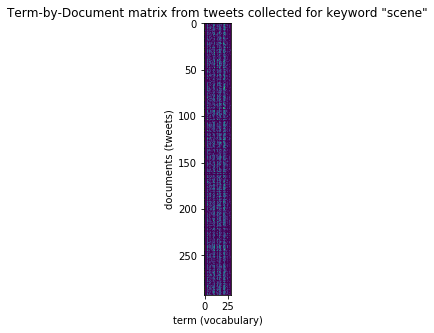

In [34]:
'''
compute the term-by-document matrix and the the dictionary from the collection of 
tweets collected for the first keyword
'''
k1_termdoc, k1_vocab = construct_termdoc(k1_tweets_processed)

# print out the term-by-document matrix
print(k1_termdoc)
# print out the first 5 vocabulary entries
print(' '.join(k1_vocab[-5:]))  # print out only the first 5 vocabulary entries

# visualise the term-by-document matrix
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k1_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[0]))

**Note**. Next, we would like to compute the pairwise distances between every two tweets. This will help us to see how similar tweets are. This is a computational task that would be *not* possible to do if we use the raw tweets.

However, with the term-by-document matrix, each tweet now is vector and corresponds to a row in the term-by-document matrix. Hence, we can use the distance between vectors to compute the distance between tweets. This is also known as the **vector space model** in information retrieval literature.

**Instruction 2.11**. Your tasks are:

1. Define a function to compute and return the Euclidean distance between two vectors as we have learned from the class notes. **(5 marks)**

2. Define a function to compute and return the cosine distance between two vectors as we have learned from the class notes. **(5 marks)**

3. Construct a single function that returns two distance matrices ***euclidean_distance_matrix***, and ***cosine_distance_matrix***, whose elements (i,j) store the Eulidean distance and the cosine distance between tweets i-th and i-jth. **You will need this function for subsequent task**. **(6 marks)**

**[Total mark: 16]**

In [35]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

def euclidean_distance(x,y):
    '''
    Compute and return the Euclidean distance between two vectors x and y
    '''
    dist = (np.array(x) - np.array(y))*(np.array(x) - np.array(y))
    return np.sqrt(dist.sum())

In [36]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
def cosine_distance(x,y):
    '''
    Compute and return the cosine distance between two vectors x and y
    '''
    try:
        num = (x*y).sum()
        denom = (x*x).sum() + (y*y).sum() - (x*y).sum()
        num += 0.0    
        return num/denom
    except ValueError as e:
        print("Vectors passed to the function are not the same size")
        return None
    
    


In [37]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
The function takes the termdoc matrix as the input and computes variables called "euclidean_distance_matrix" 
and "cosine_distance_matrix", which are matrices whose elements (i,j) store the Eulidean distance 
and the cosine distance between tweet i-th and i-jth.

Hint: you should store the distance matrices in numpy arrays for easier implementation in subsequent tasks
'''

def compute_distance_matrices(termdoc):
    
    dim = termdoc.shape[0]
    euclidean_distance_matrix = np.zeros([dim,dim], dtype = float)
    
    for i in range(dim):
        print(i,end=' ')
        for j in range(dim):
            euclidean_distance_matrix[i,j] = euclidean_distance(termdoc[i,:], termdoc[j,:])
            
    
    cosine_distance_matrix = np.zeros([dim,dim], dtype = float)
    
    for i in range(dim):
        print(i,end=' ')
        for j in range(dim):
            cosine_distance_matrix[i,j] = cosine_distance(termdoc[i,:], termdoc[j,:])

    return(euclidean_distance_matrix, cosine_distance_matrix)

**Instruction 2.12**. 

1. Now you need to compute the distance matrices for **k1_termdoc** and then visualise these distance matrices. **(10 marks)**

2. Explain why cosine distance is always in the range between 0 and 1. **(5 marks)**

3. (HD) Using a scatter plot demonstrate relationship between Euclidean distance and cosine distance. **(5 marks)**

4. (HD) Explain why cosine distance increases if Euclidean distance decreases and vice versa. **(5 marks)**


**[Total mark: 25]**

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

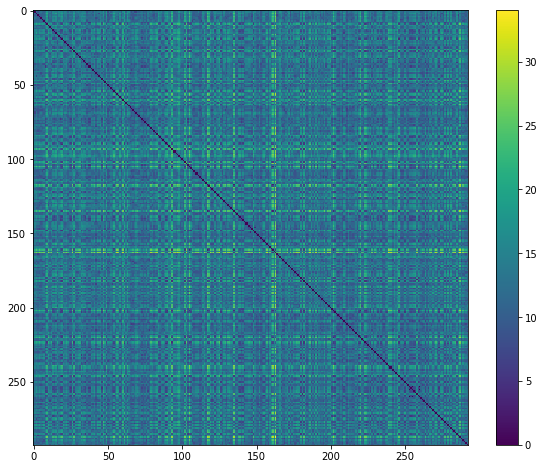

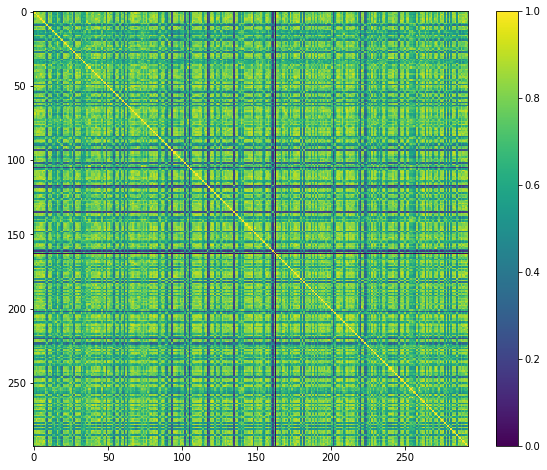

In [38]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# compute the distance matrices for k1_termdoc using the function "compute_distance_matrices"

euclidean_distance_matrix, cosine_distance_matrix = compute_distance_matrices(k1_termdoc)

# Visualise the distance matrices for this keyword
# Hint: use imshow() and colorbar() functions
# INSERT YOUR CODE HERE


plt.figure(figsize=(10,8))
plt.imshow(euclidean_distance_matrix)
plt.colorbar()

plt.figure(figsize=(10,8))
plt.imshow(cosine_distance_matrix)
plt.colorbar()



In [39]:
# Explain why cosine distance is always in the range between 0 and 1.
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
# Cosine distance is always in the range of 0 and 1 because it is a measure of orientation and not magnitude. 
# Cosine distance is particularly used in positive space, where the outcome is bounded in [0,1]

Text(0, 0.5, 'cosine_distance_matrix')

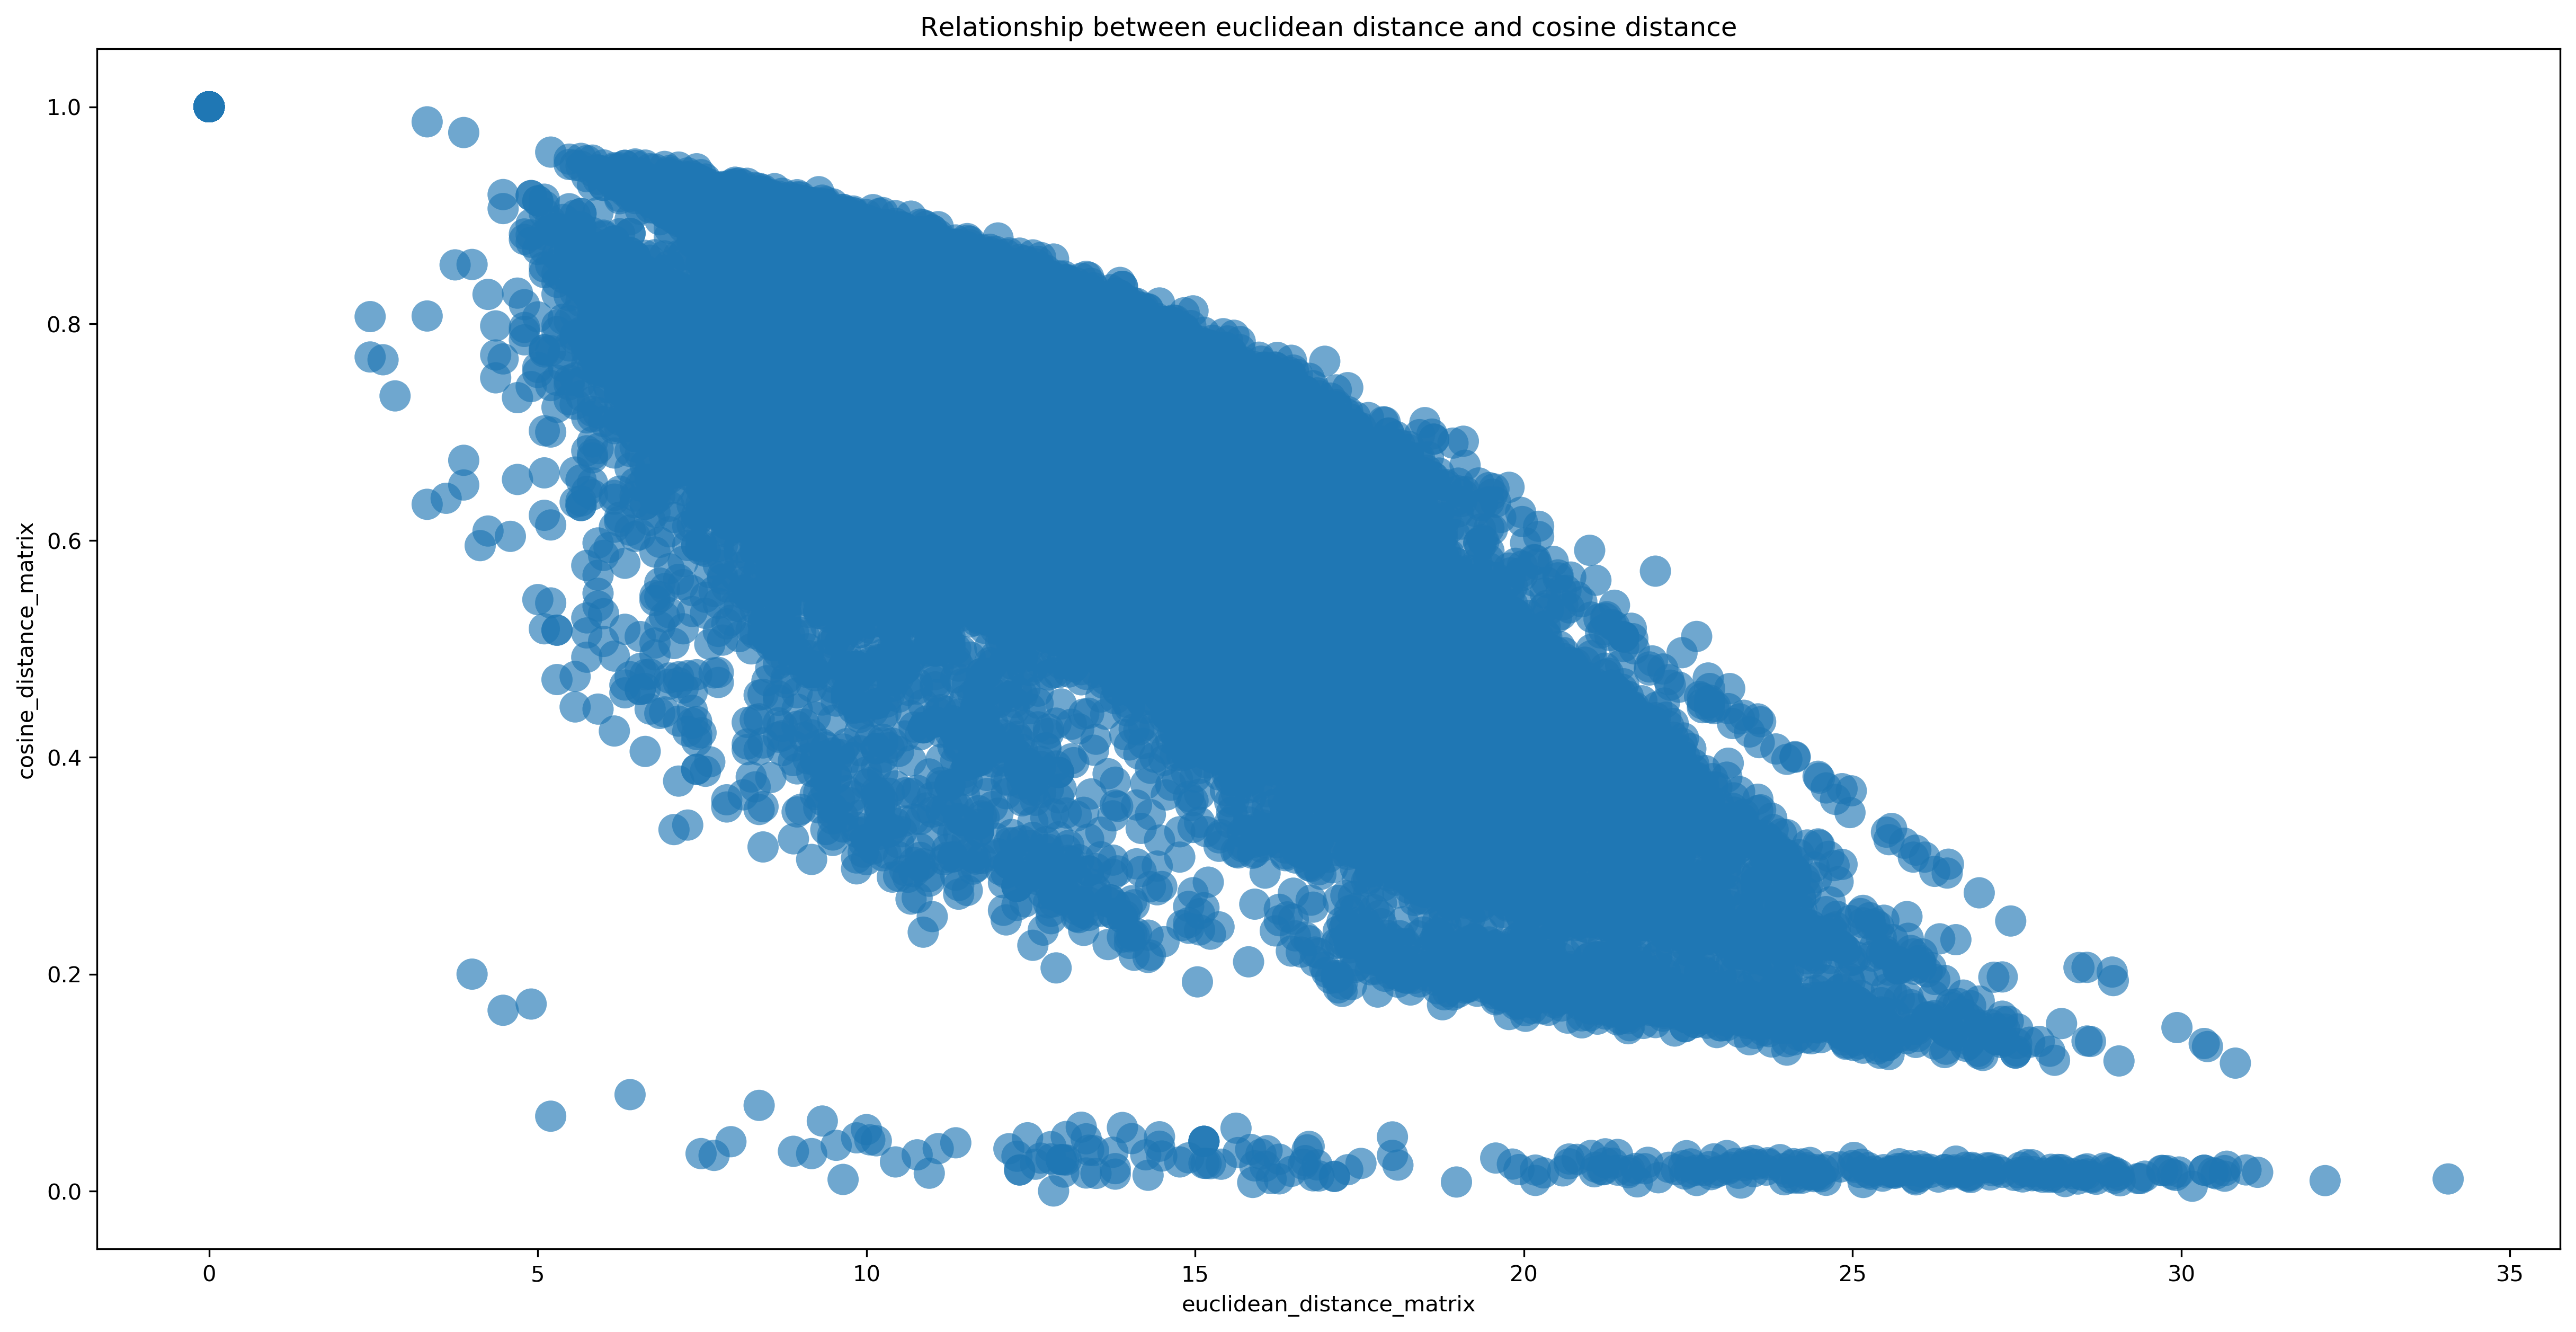

In [40]:
# Using a scatter plot demonstrate relationship between Euclidean distance and cosine distance.
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
# INSERT YOUR CODE HERE

fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
ax.scatter(euclidean_distance_matrix, cosine_distance_matrix, alpha=0.4, edgecolor='none', s=200)
ax.set(title ='Relationship between euclidean distance and cosine distance')
ax.set_xlabel('euclidean_distance_matrix')
ax.set_ylabel('cosine_distance_matrix')



In [41]:
# Explain why cosine distance increases if Euclidean distance decreases and vice versa.
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
# When we take the cosine value of an angle (ie: angle of 90: cos(90) = 0, cos(0) = 1). 
# The angle decreases and the euclidean distance decreases, the cosine value / distance actually increases.
# If cosine increases to 1, it means that the angle decreases and the actual distance between two points is decreasing.



**Instruction 2.13**. Similar to the example above for the first keyword, your task is to write codes in the cell below to compute the term-by-document matrix and the vocabulary for tweets stored in ***k2_tweets_processed***, print out the first **5** vocabularies and visualise this term-by-document matrix.

[**Total mark: 5**]

v w x y z


Text(0.5, 1.0, 'Term-by-Document matrix from tweets collected for keyword "plate"')

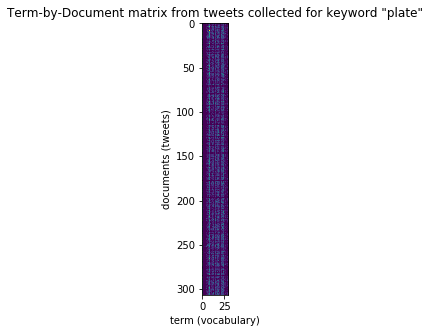

In [42]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your codes to compute the term-by-document matrix and the vocabulary for tweets stored 
in k2_tweets_processed
'''
k2_termdoc, k2_vocab = construct_termdoc(k2_tweets_processed)

'''
Write your code print out the first 5 vocabularies 
'''

print(' '.join(k2_vocab[-5:]))  

'''
Write your code to visualise the term-by-document matrix
'''
# visualise the term-by-document matrix
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k2_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[1]))



***Instruction 2.14***. Next, your task is to write codes in the cell below to calculate the pairwise distance matrix for tweets collected for **second** keyword. Store this distance matrix in the variable named ***k2_euclidean_distances*** and **visualise** this matrix.

[**Total mark: 10**]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

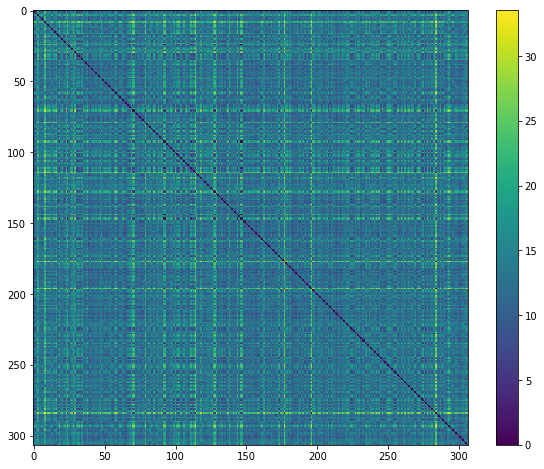

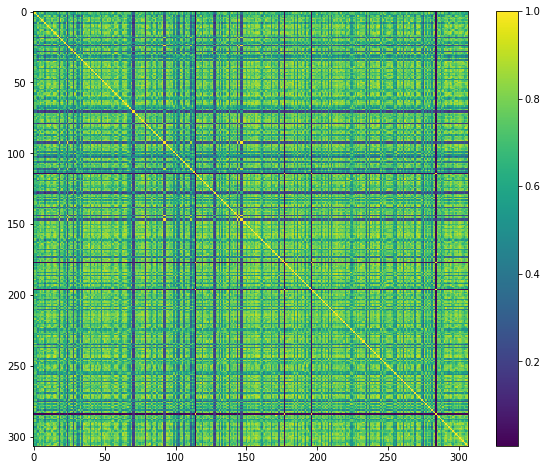

In [43]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# compute the distance matrix for k2_termdoc using the function "compute_distance_matrices"
# INSERT YOUR CODE HERE

euclidean_distance_matrix, cosine_distance_matrix = compute_distance_matrices(k2_termdoc)
k2_euclidean_distances = euclidean_distance_matrix
k2_cosine_distances = cosine_distance_matrix

# Visualise the distance matrix for this keyword
# Hint: use imshow() and colorbar() functions
# INSERT YOUR CODE HERE

plt.figure(figsize=(10,8))
plt.imshow(k2_euclidean_distances)
plt.colorbar()

plt.figure(figsize=(10,8))
plt.imshow(k2_cosine_distances)
plt.colorbar()


**Instruction 2.15**. Similarly, your task is to write codes in the cell below to compute the term-by-document matrix and the vocabulary for tweets stored in ***k3_tweets_processed***, print out the first **5** vocabularies and visualise this term-by-document matrix.

[**Total mark: 5**]

v w x y z


Text(0.5, 1.0, 'Term-by-Document matrix from tweets collected for keyword "duck"')

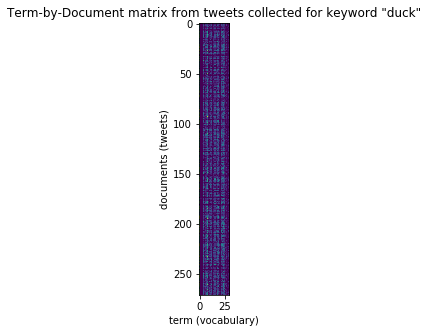

In [44]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your codes to compute the term-by-document matrix and the vocabulary for tweets stored 
in k3_tweets_processed
'''
# INSERT YOUR CODE HERE

k3_termdoc, k3_vocab = construct_termdoc(k3_tweets_processed)

'''
Write your code print out the first 5 vocabularies 
'''
# INSERT YOUR CODE HERE
print(' '.join(k3_vocab[-5:])) 

'''
Write your code to visualise the term-by-document matrix
'''
# INSERT YOUR CODE HERE
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k3_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[2]))


***Instruction 2.16***. Next, your task is to write codes in the cell below to calculate the pairwise distance matrix for tweets collected for **third** keyword. Store this distance matrix in the variable named ***k3_euclidean_distances*** and visualise this matrix.

[**Total mark: 5**]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 0 1 2 3 4 5 6 7 8 9 10 11 

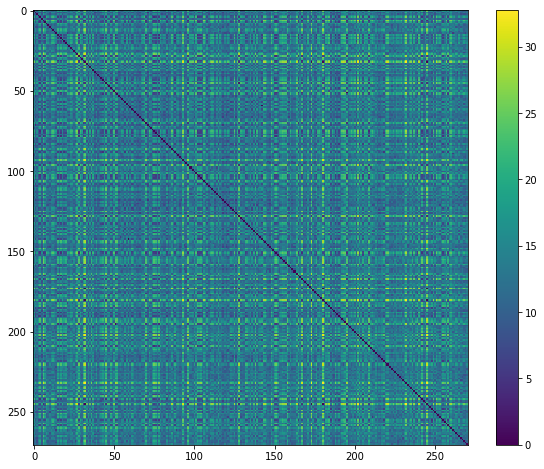

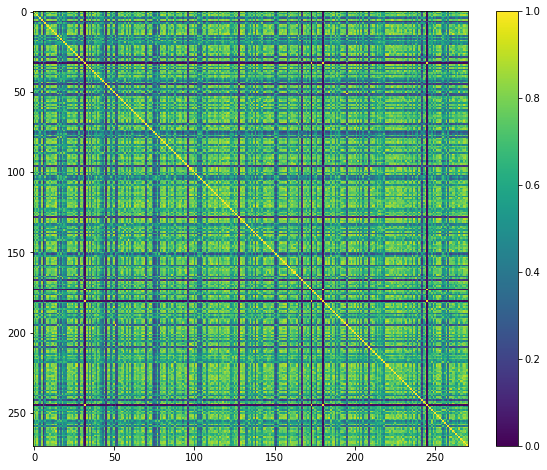

In [45]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# compute the distance matrices for k3_termdoc using the function "compute_distance_matrices"
# INSERT YOUR CODE HERE

euclidean_distance_matrix, cosine_distance_matrix = compute_distance_matrices(k3_termdoc)
k3_euclidean_distances = euclidean_distance_matrix
k3_cosine_distances = cosine_distance_matrix

# Visualise the distance matrix for this keyword
# Hint: use imshow() and colorbar() functions
# INSERT YOUR CODE HERE

plt.figure(figsize=(10,8))
plt.imshow(k3_euclidean_distances)
plt.colorbar()

plt.figure(figsize=(10,8))
plt.imshow(k3_cosine_distances)
plt.colorbar()

***Instruction 2.17 (HD)***. Compare the ranges of the values for cosine and Euclidean distances. Explain why the ranges are different. Think about the best example to explain why cosine distance is more convenient than Euclidean distance for text analysis.

[**Total mark: 5**]

In [46]:
# Compare the ranges of the values for cosine and Euclidean distances. 
# Explain why the ranges are different. Explain why cosine distance 
# is more convenient than Euclidean distance for text analysis.
#
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
# The ranges above are different as the Euclidean distance is used to measure the absolute distance of each point in space, where each point with cooordinates / text values is directly related. 
# The cosine distance measures the angle between the vector space, more strongly reﬂecting differences in direction rather than position.
# Hence why using cosine distance is more convenient (in this case) as it is generally used as a metric for measuring distance when the magnitude of the vectors does not matter. 
# This happens for example when working with text data represented by word counts as seen within this particular assignment.


### Part 2C: Data Clustering

Thus far in this assignment, we have collected tweets for each keyword and analysed them seperately. We have constructed the term-by-document matrix for each collection of tweets seperately. A fundemantal and common task in data science, analytics, machine learning, science and engineering is **clustering**. This is also known as unsupervised learning or exploratory data analysis as we have learned in our classes.

This part of this assignment will use the Kmeans algorithm learned in our classes to cluster the **entire** colllection of tweets collected for **all** keywords. To do so, we need to compute the **distance** between **any** two pair of tweets. This requires us to compute a **joint** term-by-document matrix for all tweets.

The reason that we **cannot** use the individual term-by-document matrices computed earlier (e.g.,***k1_termdoc, k2_termdoc, k3_termdoc***) for this task is because they have different dictionary sizes. Hence, tweets collected for different keywords have been represented by vectors of different dimension. 

The following piece of codes will help you to inspect these dimensions.

In [47]:
print('Dimension of the term-by-document matrix for keyword \"{}\":'.format(keywords[0]))
print('{} x {}\n'.format(k1_termdoc.shape[0],k1_termdoc.shape[1]))

print('Dimension of the term-by-document matrix for keyword \"{}\":'.format(keywords[1]))
print('{} x {}\n'.format(k2_termdoc.shape[0],k2_termdoc.shape[1]))

print('Dimension of the term-by-document matrix for keyword \"{}\":'.format(keywords[2]))
print('{} x {}\n'.format(k3_termdoc.shape[0],k3_termdoc.shape[1]))

Dimension of the term-by-document matrix for keyword "scene":
293 x 29

Dimension of the term-by-document matrix for keyword "plate":
307 x 30

Dimension of the term-by-document matrix for keyword "duck":
271 x 30



**Note**. First, we need to gather all tweets together into a new variable named **all_tweets_processed** using the piece of codes below.

In [48]:
all_tweets_processed = k1_tweets_processed + k2_tweets_processed + k3_tweets_processed

**Instruction 2.18**. Your task is to write codes in the cell below to compute the term-by-document matrix and the vocabulary for all tweets stored in ***all_tweets_processed***, print out the first 5 vocabularies and visualise this term-by-document matrix.

[**Total marks: 5**]

v w x y z


Text(0.5, 1.0, 'Term-by-Document matrix from tweets collected for all keywords')

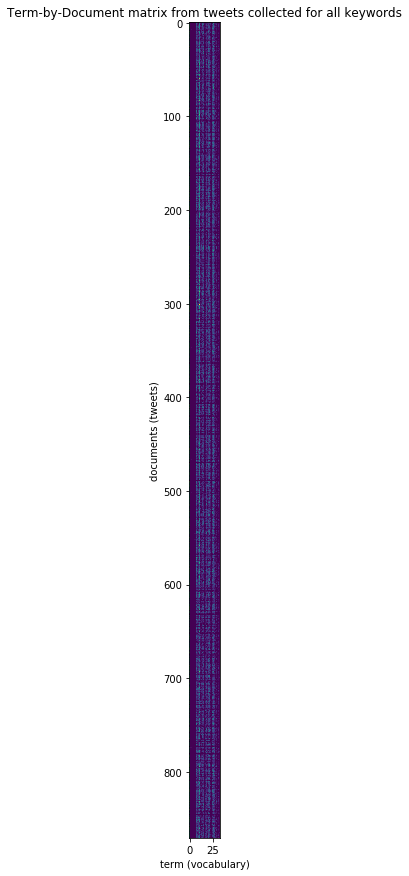

In [49]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your codes to compute the term-by-document matrix and the vocabulary for all tweets stored 
in all_tweets_processed
'''

all_termdoc, all_vocab = construct_termdoc(all_tweets_processed)

'''
Write your code print out the first 5 vocabularies 
'''
print(' '.join(all_vocab[-5:]))

'''
Write your code to visualise the term-by-document matrix
'''
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(all_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for all keywords')



**Instruction 2.19**. Next, your task is to write codes in the cell below to calculate the pairwise distance matrix for all tweets collected. Store this distance matrix in the variable named ***all_euclidean_distances*** and visualise this matrix.

[**Total mark: 5**]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

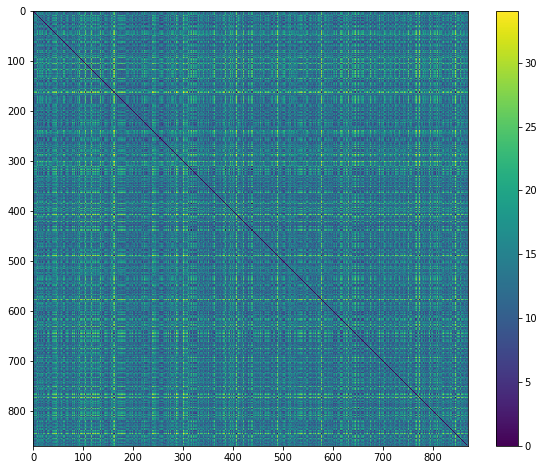

In [50]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# compute the Euclidean distance matrix using compute_distance_matrices() function

all_euclidean_distances, all_cosine_distances = compute_distance_matrices(all_termdoc)

# Visualise the distance matrix for this keyword
# INSERT YOUR CODE HERE

plt.figure(figsize=(10,8))
plt.imshow(all_euclidean_distances)
plt.colorbar()

**Instruction 2.20 (HD)**. 
1. Your task is to produce a scatter plot of Euclidean vs cosine distance for all tweets. [**2 marks**]
2. Fit first and second order polynomials to the data in the scatter plot and overplot them. [**3 marks**]
3. Explain why the plotted curves do not go through the centre of the points cloud. [**4 marks**]
4. Which visualisation technique would be better to use here? [**1 mark**]

[**Total mark: 10**]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

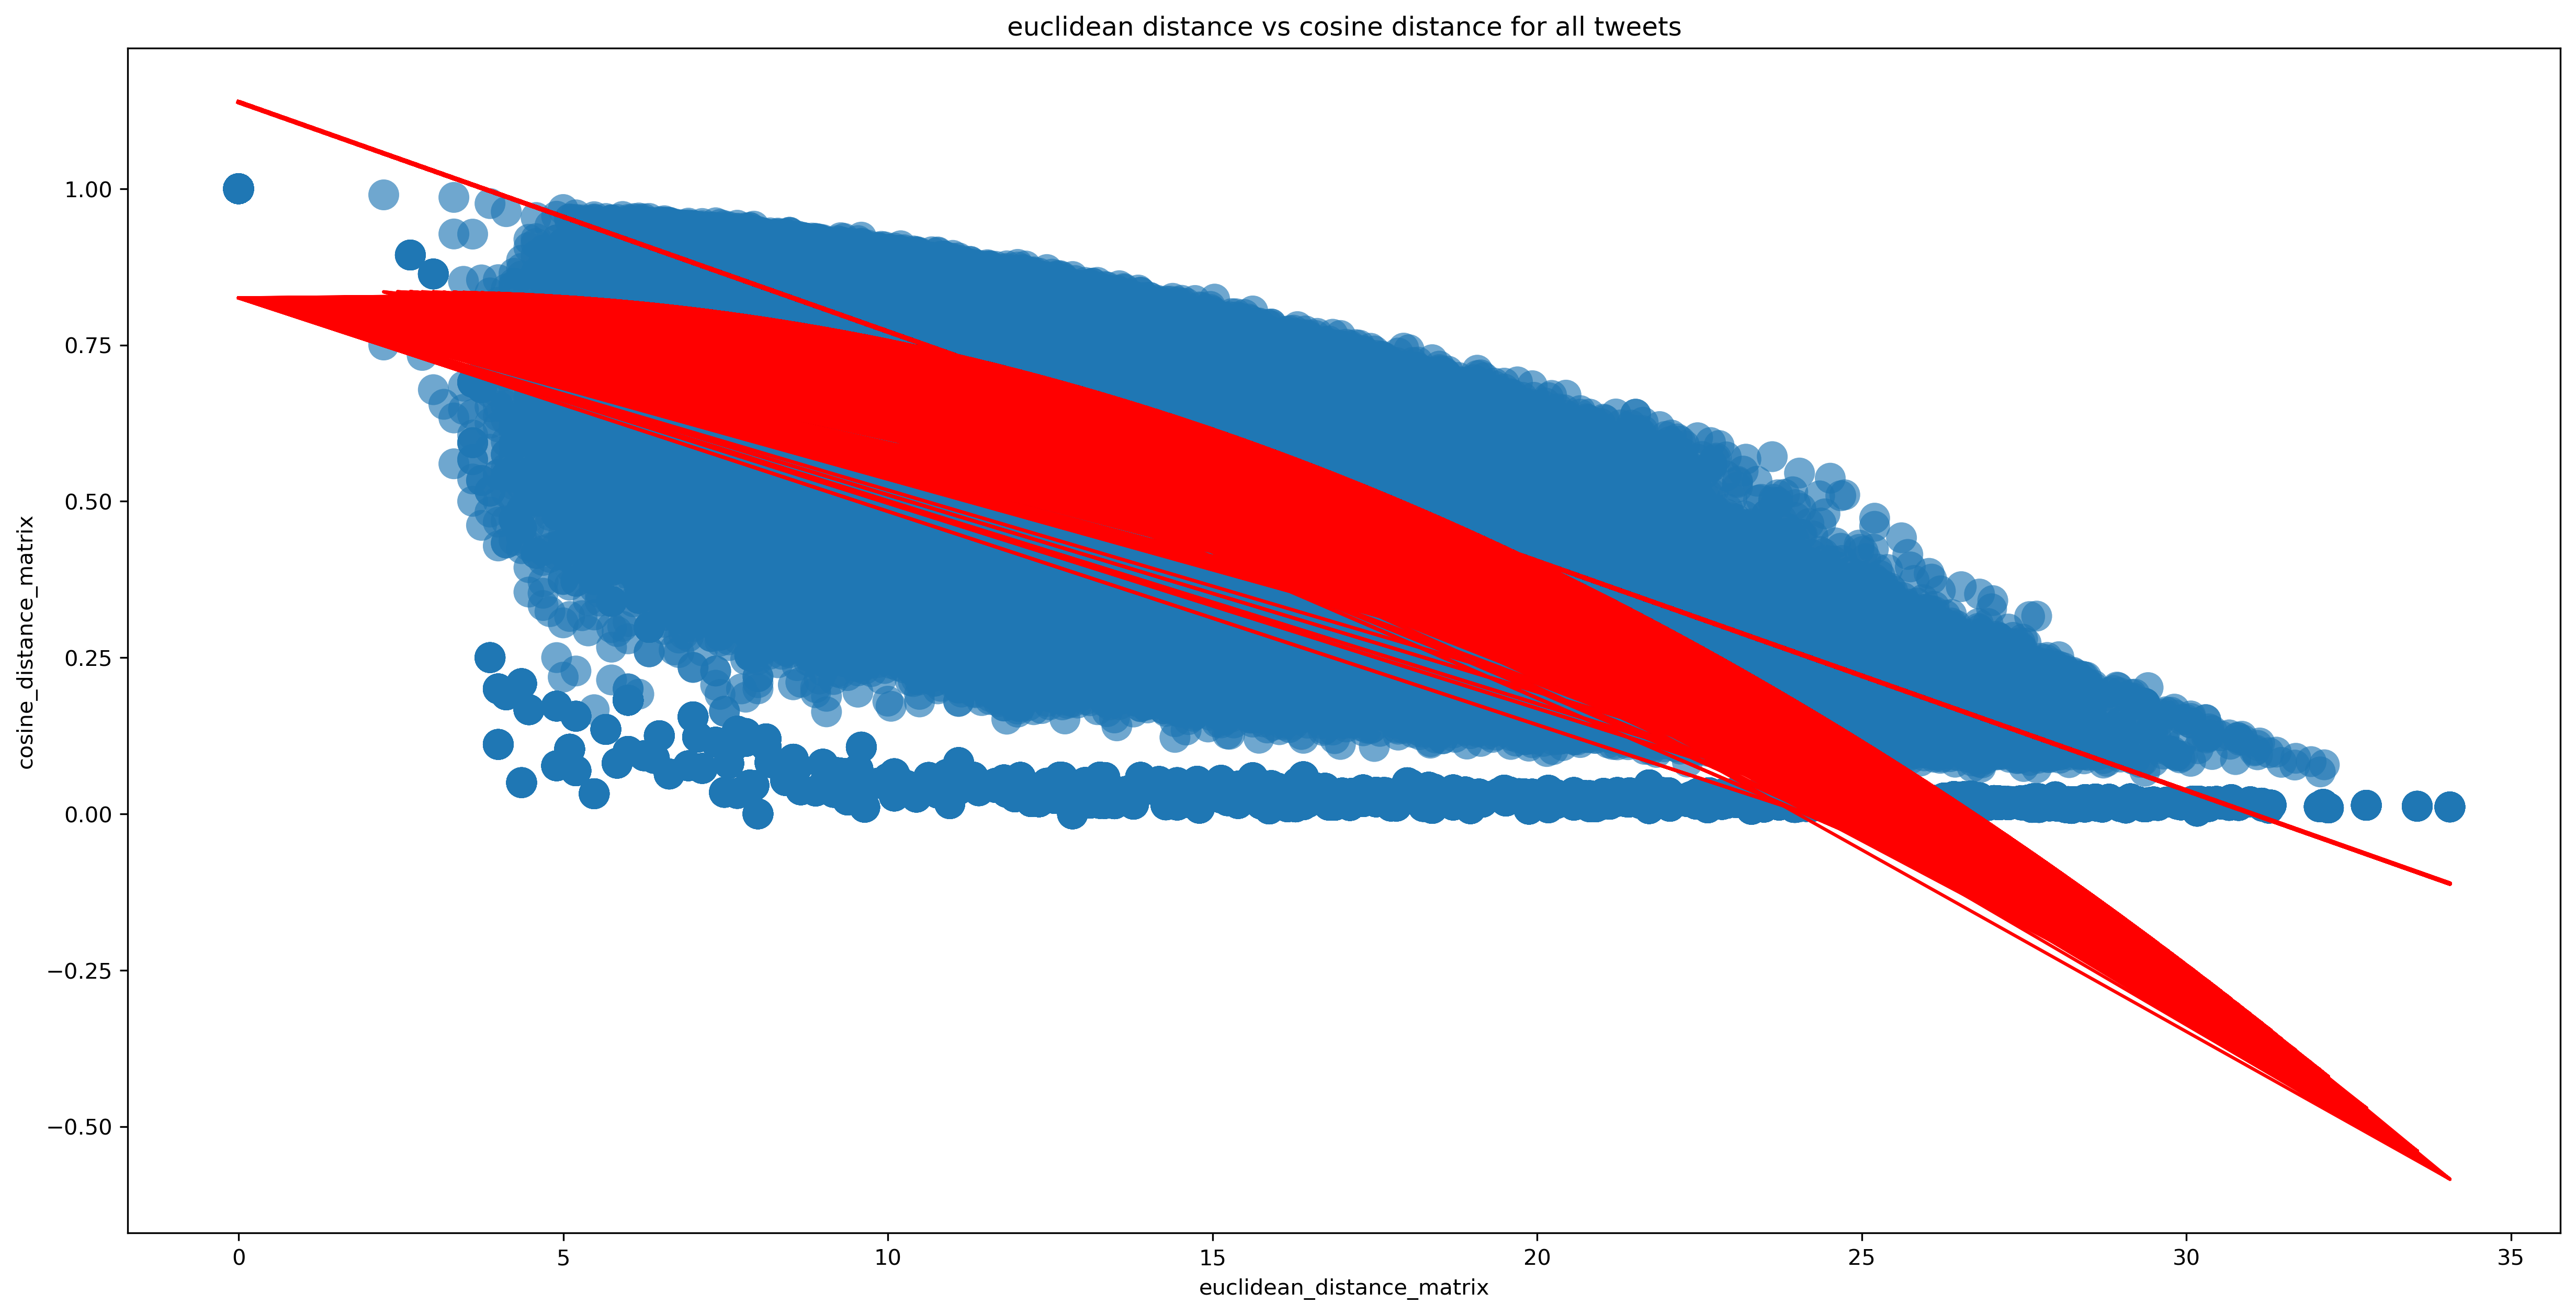

In [53]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
# 1. Your task is to produce a scatter plot of Euclidean vs cosine distance for all tweets.
# INSERT YOUR CODE HERE

euclidean_distance_matrix, cosine_distance_matrix = compute_distance_matrices(all_termdoc)

fig, ax = plt.subplots(figsize=(20, 10), dpi=300)

ax.scatter(euclidean_distance_matrix, cosine_distance_matrix, alpha=0.4, edgecolor='none', s=200)
ax.set(title ='euclidean distance vs cosine distance for all tweets')
ax.set_xlabel('euclidean_distance_matrix')
ax.set_ylabel('cosine_distance_matrix')

# 2. Fit a second order polynomial to the data in the scatter plot and overplot it. 
# INSERT YOUR CODE HERE

x = euclidean_distance_matrix
y = cosine_distance_matrix
a = x.flatten()
b = y.flatten()
coefs = poly.polyfit(a, b, 1)
coef2 = poly.polyfit(a, b, 2)
ffit = poly.polyval(a, coefs)
ffit2= poly.polyval(a, coef2)
plt.plot(a, ffit, 'r', lw=2)
plt.plot(a, ffit2, 'r')

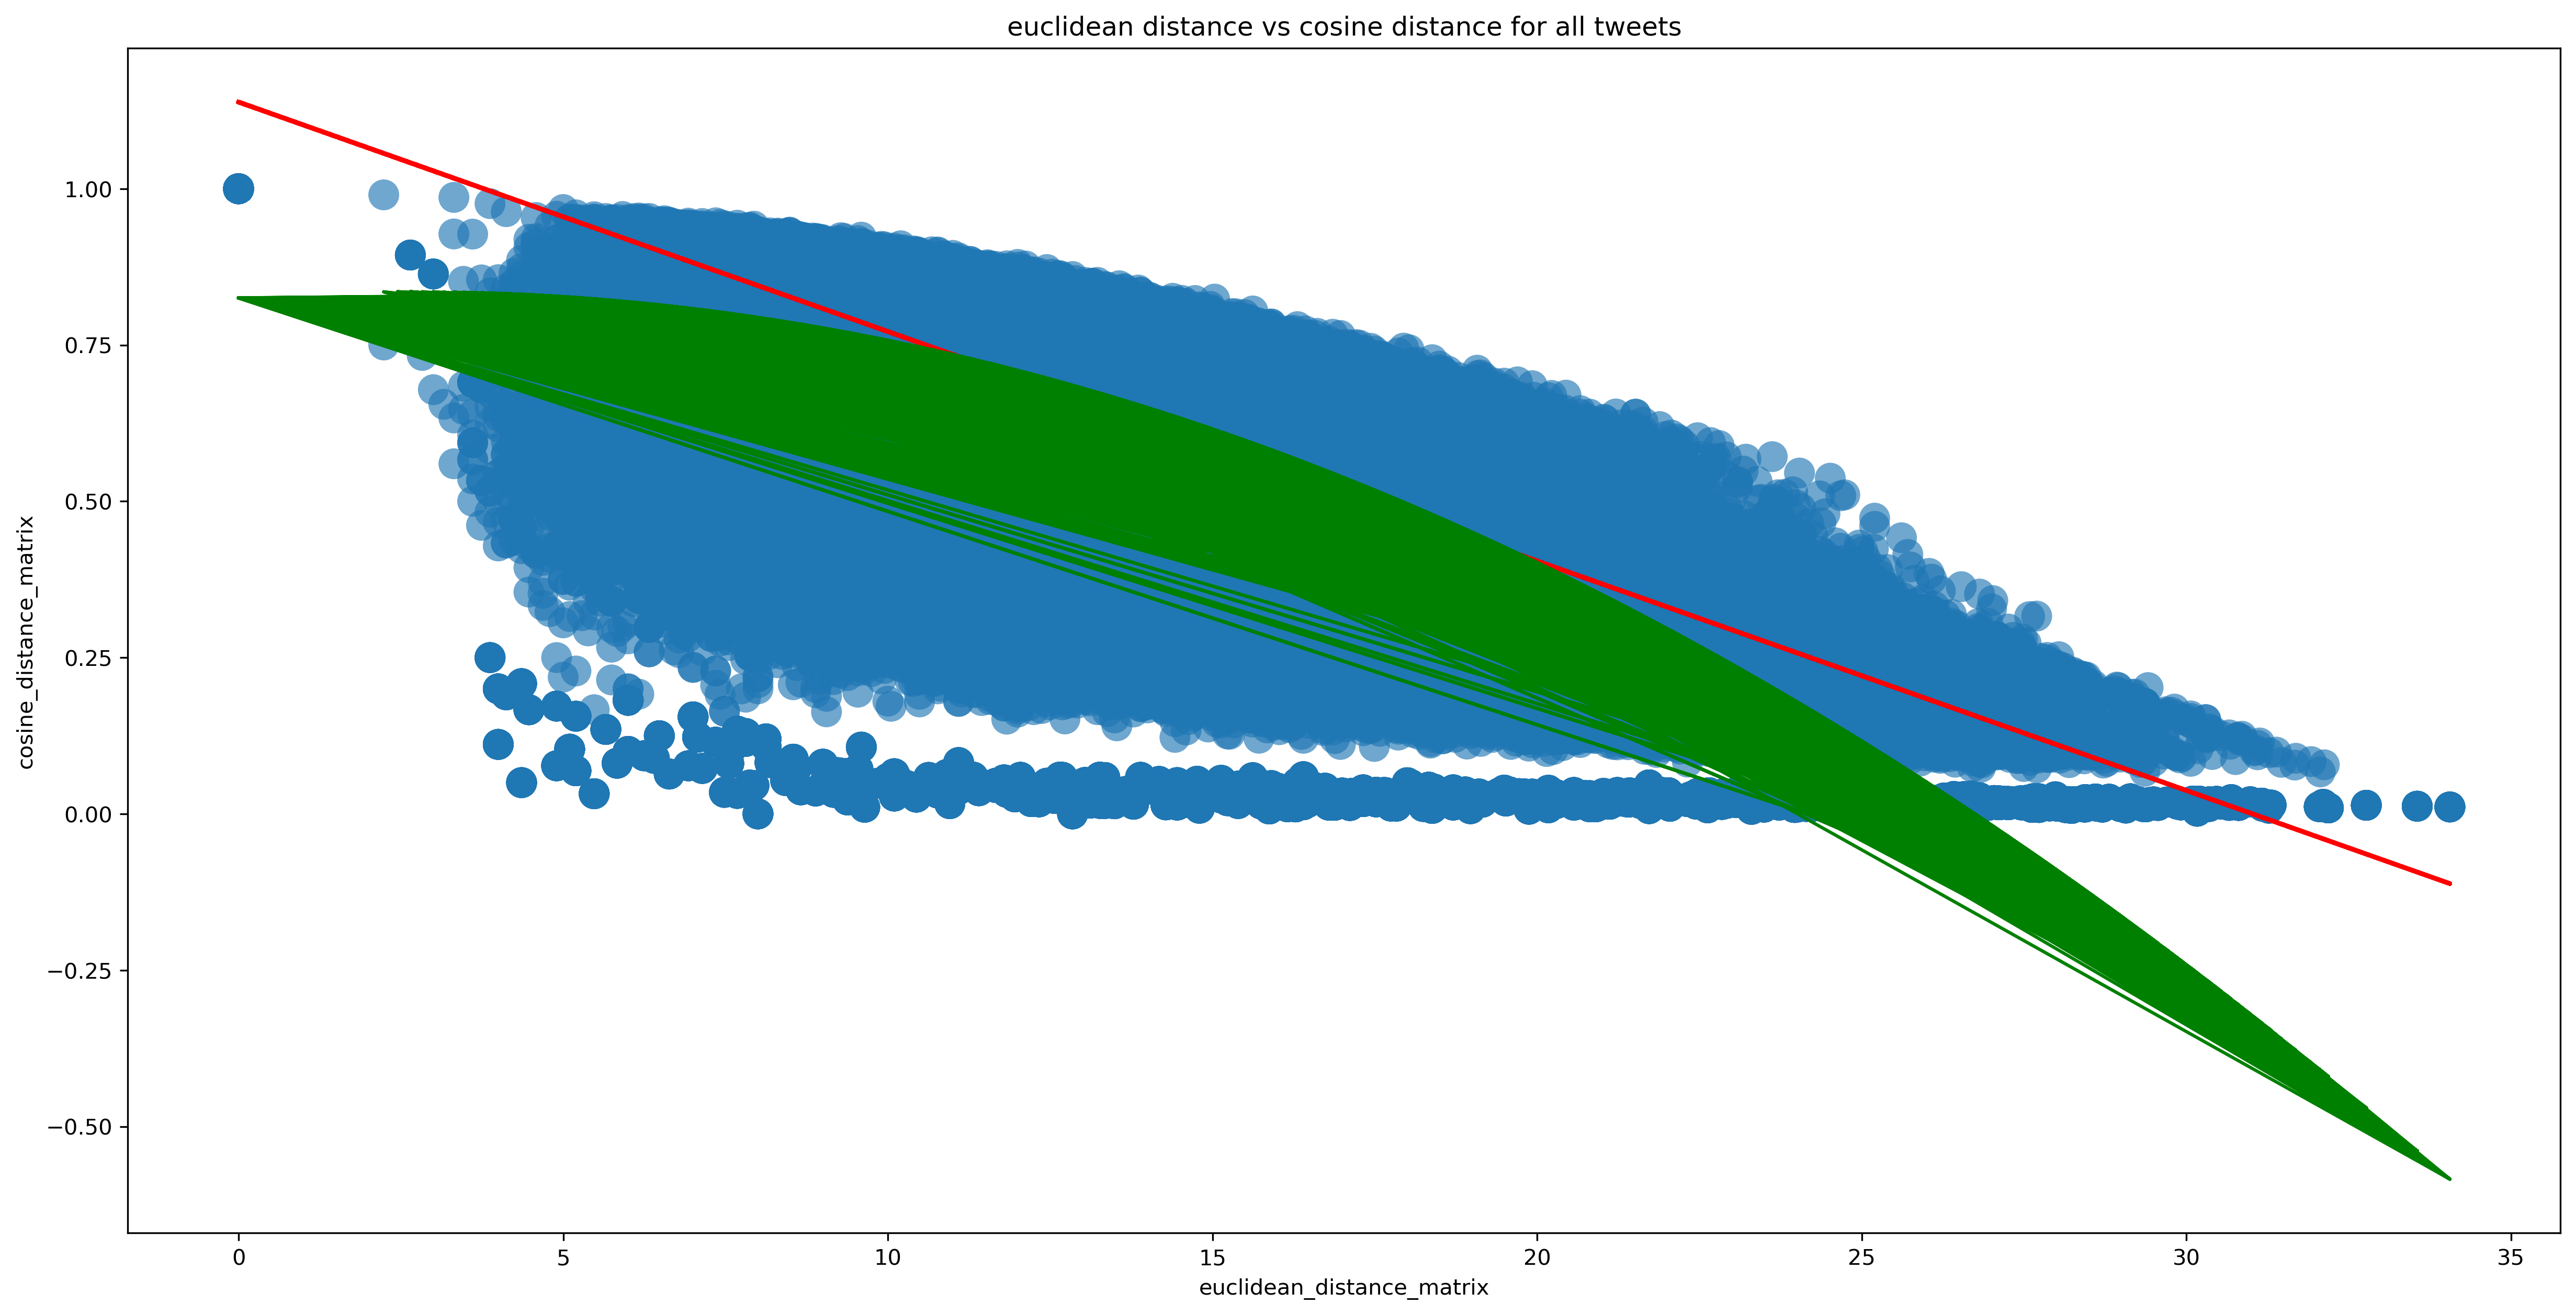

In [62]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
# 1. Your task is to produce a scatter plot of Euclidean vs cosine distance for all tweets.
# INSERT YOUR CODE HERE

fig, ax = plt.subplots(figsize=(20, 10), dpi=300)

ax.scatter(euclidean_distance_matrix, cosine_distance_matrix, alpha=0.4, edgecolor='none', s=200)
ax.set(title ='euclidean distance vs cosine distance for all tweets')
ax.set_xlabel('euclidean_distance_matrix')
ax.set_ylabel('cosine_distance_matrix')

# 2. Fit a second order polynomial to the data in the scatter plot and overplot it. 
# INSERT YOUR CODE HERE

x = euclidean_distance_matrix
y = cosine_distance_matrix
a = x.flatten()
b = y.flatten()
c=x.ravel()
d=y.ravel()
coefs = poly.polyfit(a, b, 1)

ffit = poly.polyval(a, coefs)

plt.plot(a, ffit, 'r', lw=2)

coef2=np.polyfit(a,b,2)
poly_fit=np.poly1d(coef2)
plt.plot(a, poly_fit(a), 'g')

In [44]:
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
#3. Explain why the plotted curves do not go through the centre of the points cloud.
#4. Which visualisation technique would be better to use here?
# INSERT YOUR COMMENTS HERE
#


**Note**. Next, we use Kmeans algorithm to cluster all tweets stored in term-by-document matrix ***all_termdoc***. An important requirement for the Kmeans is the specification of the number of clusters which will be specified the variable **n_clusters**.

The following piece of codes will initialise a ***kmeans*** object to be used for subsequent clustering task.

In [45]:
'''
Initialise a kmeans object  from scikit-lean package
'''
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=5, max_iter=3000,
                verbose=True, tol=0.000001, random_state=123456)


**Instruction 2.21**. Your task is to use the variable ***kmeans*** to perform clustering on the data stored in the variable ***all_termdoc***.

[**Total mark: 5**]

In [46]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

'''
Use the variable kmeans to perform clustering on the data stored in the variable all_termdoc
Hint: revise the practical session on Kmeans algorithm or check out the documentation from scikit-learn
for Kmeans algorithm.
'''
# INSERT YOUR CODE HERE

kmeans.fit(all_termdoc)

kmeans.predict(all_termdoc)



Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 65577.06514182653
start iteration
done sorting
end inner loop
Iteration 1, inertia 55518.44529991948
start iteration
done sorting
end inner loop
Iteration 2, inertia 55006.867908401204
start iteration
done sorting
end inner loop
Iteration 3, inertia 54722.828637141414
start iteration
done sorting
end inner loop
Iteration 4, inertia 54557.0960097483
start iteration
done sorting
end inner loop
Iteration 5, inertia 54416.6080144399
start iteration
done sorting
end inner loop
Iteration 6, inertia 54318.04814273446
start iteration
done sorting
end inner loop
Iteration 7, inertia 54245.81252761839
start iteration
done sorting
end inner loop
Iteration 8, inertia 54183.24136629091
start iteration
done sorting
end inner loop
Iteration 9, inertia 54145.67389423319
start iteration
done sorting
end inner loop
Iteration 10, inertia 54122.60333417849
start iteration
done sorting
end inner loop
Iteration 11, iner

array([0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 0,
       2, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2,
       0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       1, 2, 1, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 2, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2,
       1, 1, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 0, 2, 1,

**Instruction 2.22**. Write your codes to print out the cluster centers.

[**Total mark: 5**]

[[ 1.57103659e+01 -2.16840434e-18 -5.03069808e-17 -2.16840434e-18
   3.04878049e-03  6.09756098e-03  6.09756098e-03  6.20121951e+00
   1.23475610e+00  2.60670732e+00  3.03963415e+00  1.10030488e+01
   1.33231707e+00  2.00914634e+00  4.21951220e+00  4.95426829e+00
   1.37195122e-01  1.13719512e+00  4.59756098e+00  1.92073171e+00
   5.29268293e+00  5.19207317e+00  1.64634146e+00  7.01219512e-02
   5.53963415e+00  4.88414634e+00  7.34146341e+00  3.07926829e+00
   9.02439024e-01  1.74085366e+00  1.09756098e-01  1.53048780e+00
   8.53658537e-02 -2.16840434e-18]
 [ 6.08370044e+00  3.90312782e-18  4.40528634e-03  3.90312782e-18
   3.90312782e-18  1.56125113e-17  1.56125113e-17  2.56387665e+00
   3.70044053e-01  1.44052863e+00  1.31718062e+00  3.99559471e+00
   5.41850220e-01  8.32599119e-01  1.54185022e+00  1.85903084e+00
   7.92951542e-02  7.97356828e-01  2.21145374e+00  7.18061674e-01
   2.00881057e+00  1.94713656e+00  7.75330396e-01  2.64317181e-02
   2.07929515e+00  2.02202643e+00  2.7841

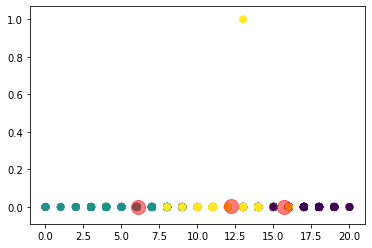

In [47]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your codes to print out the cluster centers.
'''
# INSERT YOUR CODE HERE


print(kmeans.cluster_centers_)

y_kmeans = kmeans.predict(all_termdoc)

plt.scatter(all_termdoc[:, 0], all_termdoc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);


**Instruction 2.23 (HD)**. Explain below why visualising the clusters here is hard to do in this case.

[**Total mark: 5**]

In [48]:
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
# Explain below why visualising the clusters here is hard to do in this case.
# INSERT YOUR COMMENT HERE



**Instruction 2.24 (HD)**. Nevertheless, it is possible to visualise the structure of the cluster centres - surprisingly, using bar charts. Each vector component in the cluster centre vectors corresponds to a word in the dictionary. The value (amplitude) of the vector component for each particular word in the dictionary shows the strength of presence of a word in the cluster.
In this task, you want to:
1. Plot bar charts for each of the three clusters, obtained from KMeans, where each bar chart has 20 strongest words sorted by their presence strength. [**5 marks**]
2. Explain the bar charts from the point of view of chosen keywords, English grammar and our text preprocessing routine. [**5 marks**]

[**Total mark: 10**]

In [49]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
# 1. Plot bar charts for each of the three clusters, obtained from KMeans, 
# where each bar chart has 20 strongest words sorted by their presence strength.
# INSERT YOUR CODE HERE




In [50]:
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
# Explain the bar charts from the point of view of chosen keywords, English grammar 
# and our text preprocessing routine.
# INSERT YOUR COMMENT HERE
#

**Instruction 2.25**. Write your codes to print out the first **200** cluster labels assigned to the first 200 tweets.

[**Total marks: 5**]

In [51]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your codes to print out the first **200** cluster labels assigned to the first 200 tweets.
'''
# INSERT YOUR CODE HERE

labels = kmeans.predict(all_termdoc)

print(labels[:200])


[0 2 1 1 2 2 1 0 2 0 2 1 2 1 2 0 1 1 0 0 0 0 2 0 1 2 0 0 1 0 0 1 1 1 1 1 0
 1 1 2 0 0 1 0 1 0 0 2 2 0 0 1 0 0 0 1 2 1 0 1 0 0 0 1 0 0 2 0 0 0 2 1 0 0
 0 2 0 2 1 2 0 1 0 0 2 0 0 0 2 2 2 2 0 0 2 0 1 1 0 1 2 0 1 0 0 0 1 2 2 2 1
 0 1 0 2 0 1 0 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 2 2 2 1 0 1 0 0 0 0 2 0 2 1 2
 2 2 2 1 1 1 2 1 2 0 0 0 1 0 0 2 1 0 2 2 1 2 2 2 2 2 0 2 2 2 2 0 2 1 0 1 2
 2 0 1 0 0 2 0 2 2 2 0 0 2 0 1]


**Instruction 2.26**. Next, we would like to obtain the quality of our clustering results. Write your code to obtain the labels of tweets for each keyword and store the labels in three new variables ***k1_labels***, ***k2_labels*** and ***k3_labels***, respectively.

**[Total marks: 5]**

In [52]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

'''
Write your code to obtain the labels of tweets for each keyword
and store the labels of the first keyword in ***k1_labels***, 
the labels of the second keyword in ***k2_labels*** and
the labels of the third keyword in ***k3_labels***.
'''
# INSERT YOUR CODE HERE
kmeans.fit(k1_termdoc)
k1_labels = kmeans.predict(k1_termdoc)

print(k1_labels)

kmeans.fit(k2_termdoc)
k2_labels = kmeans.predict(k2_termdoc)

print(k2_labels)

kmeans.fit(k3_termdoc)
k3_labels = kmeans.predict(k3_termdoc)

print(k3_labels)



Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 19111.565538847117
start iteration
done sorting
end inner loop
Iteration 1, inertia 17927.46776378166
start iteration
done sorting
end inner loop
Iteration 2, inertia 17642.643946115997
start iteration
done sorting
end inner loop
Iteration 3, inertia 17552.264571877455
start iteration
done sorting
end inner loop
Iteration 4, inertia 17512.286998800464
start iteration
done sorting
end inner loop
Iteration 5, inertia 17485.272839145873
start iteration
done sorting
end inner loop
Iteration 6, inertia 17470.872430980995
start iteration
done sorting
end inner loop
Iteration 7, inertia 17468.334528162115
start iteration
done sorting
end inner loop
Iteration 8, inertia 17462.94890918028
start iteration
done sorting
end inner loop
Iteration 9, inertia 17460.487239251834
start iteration
done sorting
end inner loop
Iteration 10, inertia 17460.487239251834
center shift 0.000000e+00 within tolerance 3.007756e-

Iteration 3, inertia 16023.481457431459
start iteration
done sorting
end inner loop
Iteration 4, inertia 15980.052472603547
start iteration
done sorting
end inner loop
Iteration 5, inertia 15959.979400534556
start iteration
done sorting
end inner loop
Iteration 6, inertia 15952.55698005698
start iteration
done sorting
end inner loop
Iteration 7, inertia 15941.06834403081
start iteration
done sorting
end inner loop
Iteration 8, inertia 15933.546137241978
start iteration
done sorting
end inner loop
Iteration 9, inertia 15928.972986223704
start iteration
done sorting
end inner loop
Iteration 10, inertia 15909.735632183909
start iteration
done sorting
end inner loop
Iteration 11, inertia 15882.293860186288
start iteration
done sorting
end inner loop
Iteration 12, inertia 15861.244280054976
start iteration
done sorting
end inner loop
Iteration 13, inertia 15858.027510351967
start iteration
done sorting
end inner loop
Iteration 14, inertia 15858.027510351967
center shift 0.000000e+00 within 

**Instruction 2.27 (D)**. We examine what is the proprotion of tweets from different keywords (or categories) appear in the **first** cluster. Remember that **0** is the label for the first cluster (**1** for the second and **2** for the third clusters). Your tasks are:

1. Write your code to obtain the list of tweet indices of each keyword that are assigned to the first cluster. **(3 marks)**

2. Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the first cluster. **(2 marks)**

**[Total mark: 5]**

In [53]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your code to obtain the list of tweet indices of each keyword that are assigned to the first cluster.
Hint: you might want to use numpy.where function.
'''
# obtain the list of tweet indices of keyword k1 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k1_labels

k1_first_cluster = np.where(k1_labels == 0)
print("Keyword 1 tweet indices of first cluster: ", k1_first_cluster[0])


# obtain the list of tweet indices of keyword k2 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k2_labels

k2_first_cluster = np.where(k2_labels == 0)
print("Keyword 2 tweet indices of first cluster: ", k2_first_cluster[0])

# obtain the list of tweet indices of keyword k3 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k3_labels

k3_first_cluster = np.where(k3_labels == 0)
print("Keyword 3 tweet indices of first cluster: ", k3_first_cluster[0])


Keyword 1 tweet indices of first cluster:  [  9  18  19  21  36  40  46  52  53  58  60  61  62  64  65  67  69  76
  82  83  85  86  87  92  95  98 103 105 111 119 127 137 139 140 141 142
 144 161 165 174 188 189 191 195 196 198 201 202 204 205 207 213 214 218
 229 232 240 241 242 245 246 247 253 257 258 260 261 262 266 269 271 273
 274 276 278 280 289]
Keyword 2 tweet indices of first cluster:  [  2   3   5   6   8  12  14  19  25  26  35  37  39  40  46  47  53  54
  59  63  65  68  69  71  74  79  80  82  83  85  86  89  94  96  99 100
 101 104 106 110 112 113 115 119 121 123 124 125 129 130 134 136 139 141
 143 144 146 147 149 156 158 162 171 178 179 183 188 189 193 194 196 200
 209 215 216 219 226 227 229 230 231 233 234 235 241 245 246 249 250 253
 256 258 260 262 266 268 269 272 273 275 277 278 279 289 290 292 294 296
 298 304 305]
Keyword 3 tweet indices of first cluster:  [  2   3   4  13  14  15  20  22  26  29  31  33  34  36  38  39  40  42
  43  53  57  61  65  66  67  68

Number of tweets for each respective keyword assigned to first cluster: [77, 111, 92]


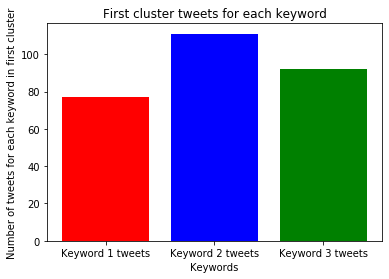

In [54]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the first cluster.
Hint: you need to plot a bar chart with three bars, 
each bar represents the number of tweets of each keyword that are assigned to the first cluster.
'''
# INSERT YOUR CODE HERE

k1_first_cluster_count = (len(k1_first_cluster[0]))
k2_first_cluster_count = (len(k2_first_cluster[0]))
k3_first_cluster_count = (len(k3_first_cluster[0]))

first_cluster_tweets = [k1_first_cluster_count, k2_first_cluster_count, k3_first_cluster_count]
print('Number of tweets for each respective keyword assigned to first cluster:', first_cluster_tweets)
        

labels = ['Keyword 1 tweets', 'Keyword 2 tweets', 'Keyword 3 tweets']
colors = ['RED','BLUE','GREEN']
plot = plt.bar(np.arange(len(labels)),first_cluster_tweets,color=colors,tick_label=labels)


plt.xlabel('Keywords')

plt.ylabel('Number of tweets for each keyword in first cluster')

plt.title('First cluster tweets for each keyword')

plt.xticks(rotation=0)

plt.show()



**Instruction 2.28 (D)**. Similarly, write your codes to compute the the proprotion of tweets from different keywords (or categories) appear in the **second** cluster and plot a bar chart visualise this information.

[**Total mark: 5**]

Keyword 1 tweet indices of second cluster:  [  2   3   4   6   8  11  13  16  17  24  28  31  32  33  34  35  37  38
  42  44  47  51  55  57  59  63  71  77  78  81  84  91  96  97  99 102
 106 110 112 116 121 125 130 136 138 146 147 151 152 153 155 160 164 166
 168 170 171 175 180 181 183 184 187 193 199 200 206 219 220 222 225 234
 235 236 238 239 243 248 263 272 275 277 284 285 286 287 290]
Keyword 2 tweet indices of second cluster:  [  0   9  13  17  22  23  29  31  32  33  36  41  42  43  44  49  57  58
  60  62  64  67  73  75  76  77  90  92  98 103 107 114 116 122 126 133
 138 140 150 154 155 164 165 167 175 177 184 185 186 191 199 204 205 207
 211 214 218 239 243 244 251 252 254 270 274 276 280 281 282 288 291 293
 297 299 300 302 303 306 308]
Keyword 3 tweet indices of second cluster:  [  0   1   6   8  10  11  19  23  24  25  27  32  37  44  47  49  50  51
  52  56  63  71  72  76  80  81  84  86  90  98  99 100 106 113 115 121
 124 128 129 133 136 138 143 149 151 153 157 1

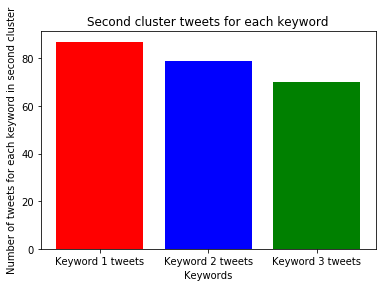

In [55]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# obtain the list of tweet indices of keyword k1 that are assigned to the second cluster
# means that to find tweet indices that have label 1 in k1_labels

k1_second_cluster = np.where(k1_labels == 1)
print("Keyword 1 tweet indices of second cluster: ", k1_second_cluster[0])


# obtain the list of tweet indices of keyword k2 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k2_labels

k2_second_cluster = np.where(k2_labels == 1)
print("Keyword 2 tweet indices of second cluster: ", k2_second_cluster[0])

# obtain the list of tweet indices of keyword k3 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k3_labels

k3_second_cluster = np.where(k3_labels == 1)
print("Keyword 3 tweet indices of second cluster: ", k3_second_cluster[0])

# Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the second cluster
# INSERT YOUR CODE HERE


k1_second_cluster_count = (len(k1_second_cluster[0]))
k2_second_cluster_count = (len(k2_second_cluster[0]))
k3_second_cluster_count = (len(k3_second_cluster[0]))

second_cluster_tweets = [k1_second_cluster_count, k2_second_cluster_count, k3_second_cluster_count]
print('Number of tweets for each respective keyword assigned to second cluster:', second_cluster_tweets)

labels = ['Keyword 1 tweets', 'Keyword 2 tweets', 'Keyword 3 tweets']
colors = ['RED','BLUE','GREEN']
plot = plt.bar(np.arange(len(labels)),second_cluster_tweets,color=colors,tick_label=labels)


plt.xlabel('Keywords')

plt.ylabel('Number of tweets for each keyword in second cluster')

plt.title('Second cluster tweets for each keyword')

plt.xticks(rotation=0)

plt.show()




**Instruction 2.29 (D)**. Similarly, write your codes to compute the the proprotion of tweets from different keywords (or categories) appear in the **third** cluster and plot a bar chart visualise this information.

[**Total mark: 5**]

Keyword 1 tweet indices of third cluster:  [  0   1   5   7  10  12  14  15  20  22  23  25  26  27  29  30  39  41
  43  45  48  49  50  54  56  66  68  70  72  73  74  75  79  80  88  89
  90  93  94 100 101 104 107 108 109 113 114 115 117 118 120 122 123 124
 126 128 129 131 132 133 134 135 143 145 148 149 150 154 156 157 158 159
 162 163 167 169 172 173 176 177 178 179 182 185 186 190 192 194 197 203
 208 209 210 211 212 215 216 217 221 223 224 226 227 228 230 231 233 237
 244 249 250 251 252 254 255 256 259 264 265 267 268 270 279 281 282 283
 288]
Keyword 2 tweet indices of third cluster:  [  1   4   7  10  11  15  16  18  20  21  24  27  28  30  34  38  45  48
  50  51  52  55  56  61  66  70  72  78  81  84  87  88  91  93  95  97
 102 105 108 109 111 117 118 120 127 128 131 132 135 137 142 145 148 151
 152 153 157 159 160 161 163 166 168 169 170 172 173 174 176 180 181 182
 187 190 192 195 197 198 201 202 203 206 208 210 212 213 217 220 221 222
 223 224 225 228 232 236 237 238

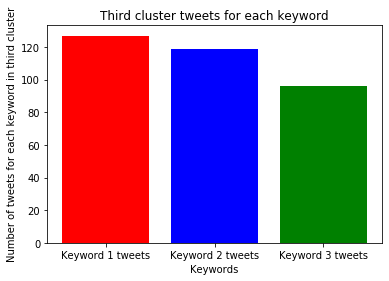

In [56]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# obtain the list of tweet indices of keyword k1 that are assigned to the third cluster
# means that to find tweet indices that have label 2 in k1_labels
k1_third_cluster = np.where(k1_labels == 2)
print("Keyword 1 tweet indices of third cluster: ", k1_third_cluster[0])


# obtain the list of tweet indices of keyword k2 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k2_labels

k2_third_cluster = np.where(k2_labels == 2)
print("Keyword 2 tweet indices of third cluster: ", k2_third_cluster[0])

# obtain the list of tweet indices of keyword k3 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k3_labels

k3_third_cluster = np.where(k3_labels == 2)
print("Keyword 3 tweet indices of third cluster: ", k3_third_cluster[0])

# Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the second cluster
# INSERT YOUR CODE HERE


k1_third_cluster_count = (len(k1_third_cluster[0]))
k2_third_cluster_count = (len(k2_third_cluster[0]))
k3_third_cluster_count = (len(k3_third_cluster[0]))

third_cluster_tweets = [k1_third_cluster_count, k2_third_cluster_count, k3_third_cluster_count]
print('Number of tweets for each respective keyword assigned to third cluster:', third_cluster_tweets)

labels = ['Keyword 1 tweets', 'Keyword 2 tweets', 'Keyword 3 tweets']
colors = ['RED','BLUE','GREEN']
plot = plt.bar(np.arange(len(labels)),third_cluster_tweets,color=colors,tick_label=labels)


plt.xlabel('Keywords')

plt.ylabel('Number of tweets for each keyword in third cluster')

plt.title('Third cluster tweets for each keyword')

plt.xticks(rotation=0)

plt.show()





### END OF ASSIGNMENT 2 NOTEBOOK

----